In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('loan.csv')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-21               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [3]:
#Shape of the Original dataset
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 39717
Number of columns: 111


# Duplicate entries

In [4]:
if(len(df) == len(df.member_id.unique())):
    print('No duplicate data found')
else:
    print('Some Duplicates are found')

No duplicate data found


# Removed all irrelevant columns

In [5]:
# post approval features -delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,
# recoveries,collection_recovery_fee,last_pymnt_d ,last_pymnt_amnt,next_pymnt_d ,chargeoff_within_12_mths

#Around 13 features are there which are Post approval so these are not useful to predict whether the loan should be given 
#to particular applicat or not

drop_cols = ["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "chargeoff_within_12_mths"]
df.drop(drop_cols, axis=1, inplace=True)
#print("Features we are left with",list(df.columns))

In [6]:
# remove non-required columns
# Not required : id,member_id ,emp_title,url,desc,title
# zip_code : Complete zip code is not available
# out_prncp_inv - not useful as its for investors
# total_pymnt_inv - not useful as it is for investors
# last_credit_pull_d - irrelevant for approval
# pub_rec_bankruptcies - single valued for more than 99%


drop_cols = ["id", "member_id", "funded_amnt","emp_title", "url", "desc", "title", "zip_code", "out_prncp_inv", "total_pymnt_inv", "last_credit_pull_d", "pub_rec_bankruptcies"]
df.drop(drop_cols, axis=1, inplace=True)
#print("Features we have in Dataset: ",list(df.columns))

In [7]:
#Shape of dataframe after removing all irrelevant features
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 39717
Number of columns: 86


# NULL Values analysis & treatment

In [8]:
#Missing value analysis
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

Features  Null values  % Null values
43                     open_rv_12m        39717     100.000000
64  mths_since_recent_revol_delinq        39717     100.000000
62        mths_since_recent_bc_dlq        39717     100.000000
61            mths_since_recent_bc        39717     100.000000
60                        mort_acc        39717     100.000000
59                  mo_sin_rcnt_tl        39717     100.000000
58           mo_sin_rcnt_rev_tl_op        39717     100.000000
57            mo_sin_old_rev_tl_op        39717     100.000000
56              mo_sin_old_il_acct        39717     100.000000
54                         bc_util        39717     100.000000
53                  bc_open_to_buy        39717     100.000000
52                     avg_cur_bal        39717     100.000000
51            acc_open_past_24mths        39717     100.000000
50                    inq_last_12m        39717     100.000000
49                     total_cu_tl        39717     100.000000
48                          inq_fi        39717     100.000000
47                total_rev_hi_lim        39717     100.000000
46                        all_util        39717     100.000000
45                      max_bal_bc        39717     100.000000
63           mths_since_recent_inq        39717     100.000000
65           num_accts_ever_120_pd        39717     100.000000
42                         il_util        39717     100.000000
66                  num_actv_bc_tl        39717     100.000000
84                  total_bc_limit        39717     100.000000
83               total_bal_ex_mort        39717     100.000000
82                 tot_hi_cred_lim        39717     100.000000
80                percent_bc_gt_75        39717     100.000000
79                  pct_tl_nvr_dlq        39717     100.000000
78              num_tl_op_past_12m        39717     100.000000
77              num_tl_90g_dpd_24m        39717     100.000000
76                    num_tl_30dpd        39717     100.000000
75                num_tl_120dpd_2m        39717     100.000000
74                        num_sats        39717     100.000000
73             num_rev_tl_bal_gt_0        39717     100.000000
72                   num_rev_accts        39717     100.000000
71                   num_op_rev_tl        39717     100.000000
70                       num_il_tl        39717     100.000000
69                       num_bc_tl        39717     100.000000
68                     num_bc_sats        39717     100.000000
67                 num_actv_rev_tl        39717     100.000000
44                     open_rv_24m        39717     100.000000
85      total_il_high_credit_limit        39717     100.000000
41                    total_bal_il        39717     100.000000
35                     tot_cur_bal        39717     100.000000
27     mths_since_last_major_derog        39717     100.000000
30                annual_inc_joint        39717     100.000000
32       verification_status_joint        39717     100.000000
34                    tot_coll_amt        39717     100.000000
31                       dti_joint        39717     100.000000
36                     open_acc_6m        39717     100.000000
37                      open_il_6m        39717     100.000000
38                     open_il_12m        39717     100.000000
39                     open_il_24m        39717     100.000000
40              mths_since_rcnt_il        39717     100.000000
20          mths_since_last_record        36931      92.985372
19          mths_since_last_delinq        25682      64.662487
7                       emp_length         1075       2.706650
26      collections_12_mths_ex_med           56       0.140998
23                      revol_util           50       0.125891
81                       tax_liens           39       0.098195
11                         issue_d            0       0.000000
8                   home_ownership            0       0.000000
10             verification_status            0       0.0

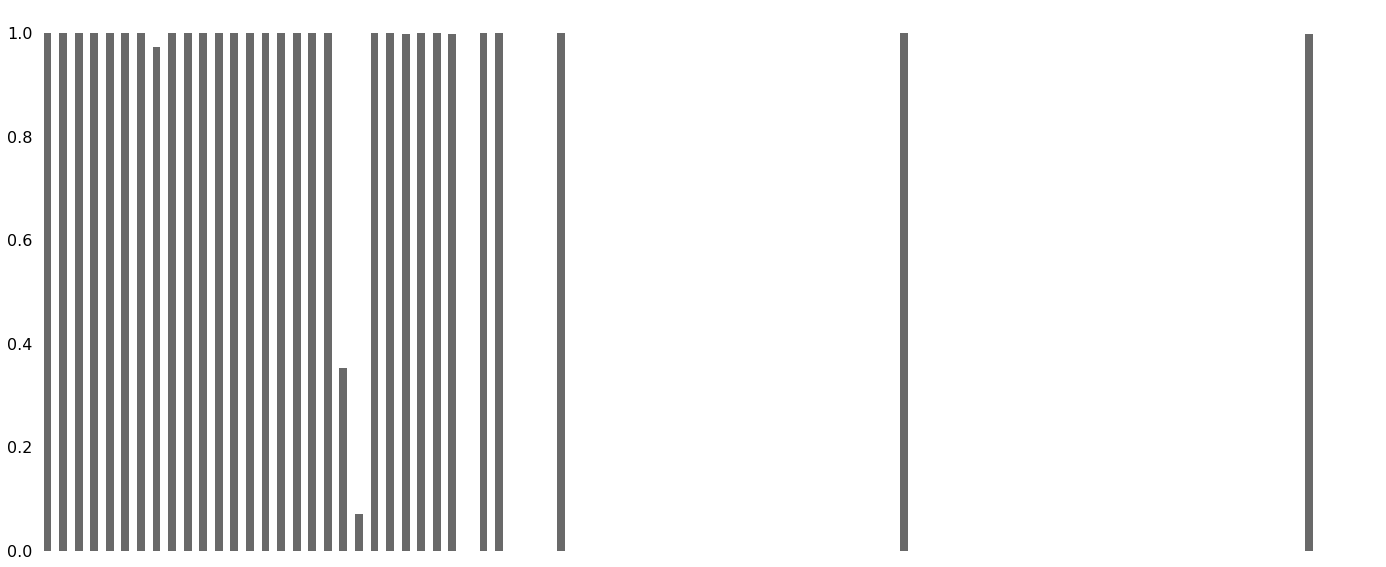

In [9]:
no.bar(df)

In [10]:
# We will drop the columns which are having more than 50% NULL Values
null_columns=null_df[null_df['% Null values']>=50]['Features']
df.drop(columns=null_columns,inplace=True)
#df.columns                 ##Columns present in the dataset
#np.array(null_columns)     ##Columns that are removed

In [11]:
# Dropping the rows which are having less tham 5% of null values in that column
null_df_5=null_df[null_df['% Null values']<5]['Features']
df.dropna(subset=null_df_5 ,axis=0, inplace=True)

In [12]:
#Imputation is done for the columns having more than 5% & less than 50% null values
cols_null=np.array(null_df[(null_df['% Null values']>5) & (null_df['% Null values']<50)]['Features'])
cols_null

#No column exists which is having null values between 5 to 50% 

array([], dtype=object)

In [13]:
#Shape after removing the 100% null valued columns
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 38539
Number of columns: 30


# Remove Single value Columns

In [14]:
#Checking number of unique values in each column. We should remove the columns that has single value. 
#Those columns will not give us meaningful information
unique_val=pd.DataFrame()
unique_val['Features']=df.nunique().index
unique_val['Unique_Values']=df.nunique().values
unique_val.sort_values(by='Unique_Values')

Features  Unique_Values
29                   tax_liens              1
27              acc_now_delinq              1
26            application_type              1
25                 policy_code              1
24  collections_12_mths_ex_med              1
23         initial_list_status              1
13                  pymnt_plan              1
28                 delinq_amnt              1
2                         term              2
10         verification_status              3
12                 loan_status              3
8               home_ownership              5
20                     pub_rec              5
5                        grade              7
18              inq_last_6mths              9
7                   emp_length             11
14                     purpose             14
6                    sub_grade             35
19                    open_acc             40
15                  addr_state             50
11                     issue_d             53
22                   total_acc             82
3                     int_rate            371
17            earliest_cr_line            432
0                    loan_amnt            879
21                  revol_util           1087
16                         dti           2863
9                   annual_inc           5091
1              funded_amnt_inv           8087
4                  installment          15101

In [15]:
#Columns that has single value are removed
df.drop(columns=unique_val[unique_val.Unique_Values==1]['Features'],inplace=True)

In [16]:
#Shape after removing all the unwanted columns
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

#Columns left in the dataset
#df.columns

df=df.reset_index(drop=True)        #Index are reset

Number of rows   : 38539
Number of columns: 22


In [17]:
df.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti earliest_cr_line  \
0   Fully Paid     credit_card         AZ  27.65           Jan-85   
1  Charged Off             car         GA   1.00           Apr-99   
2   Fully Paid  small_business         IL   8.72           Nov-21   
3   Fully Paid           other         CA  20.00           Feb-96   
4      Current           other         OR  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  
0               1         3        0     83.70%          9  
1               5         3        0      9.40%          4  
2               2         2        0     98.50%         10  
3               1        10        0        21%         37  
4               0        15        0     53.90%         38

**Removing records with loan status as "Current", as the loan is currently running and we can't infer any information regarding default from such loans.**

In [18]:
#Target variable
df['loan_status'].value_counts()

Fully Paid     32063
Charged Off     5378
Current         1098
Name: loan_status, dtype: int64

In [19]:
#Removed those records which are having loan_status as 'Current' and it is irrelevant
df=df[df['loan_status']!='Current']

#Checked for values count
df['loan_status'].value_counts()

Fully Paid     32063
Charged Off     5378
Name: loan_status, dtype: int64

# Change the Data format of some  columns

In [20]:
#Term is given in '36 months' format, changed it to 36
df['term_months']=df['term'].str.strip('months')
df.drop(columns=['term'],inplace=True)

In [21]:
#Intrest rate format was 10.65% , changed to 10.65 & datatype is also changed to float
df['int_rate(%)']=df['int_rate'].str.strip('%').astype('float')
df['revol_util(%)']=df['revol_util'].str.strip('%').astype('float')
df.drop(columns=['int_rate','revol_util'],inplace=True)

In [22]:
#Function to bring the data of emp_len in year only instead of 'n years'

def func(x):
    if '<' in x:
        return 0
    elif '+' in x:
        year= int(x.split('+')[0])
        return year
    else:
        year=int(x.split(' ')[0])
        return year
    

df['emp_length(years)']=df['emp_length'].apply(lambda a:func(a))
df.drop(columns=['emp_length'],inplace=True)
    

In [23]:
#Dataset after stripping
df.head()

loan_amnt  funded_amnt_inv  installment grade sub_grade home_ownership  \
0       5000           4975.0       162.87     B        B2           RENT   
1       2500           2500.0        59.83     C        C4           RENT   
2       2400           2400.0        84.33     C        C5           RENT   
3      10000          10000.0       339.31     C        C1           RENT   
5       5000           5000.0       156.46     A        A4           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
5     36000.0     Source Verified  Dec-11   Fully Paid         wedding   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65           Jan-85               1         3        0   
1         GA   1.00           Apr-99               5         3        0   
2         IL   8.72           Nov-21               2         2        0   
3         CA  20.00           Feb-96               1        10        0   
5         AZ  11.20           Nov-21               3         9        0   

   total_acc term_months  int_rate(%)  revol_util(%)  emp_length(years)  
0          9         36         10.65           83.7                 10  
1          4         60         15.27            9.4                  0  
2         10         36         15.96           98.5                 10  
3         37         36         13.49           21.0                 10  
5         12         36          7.90           28.3                  3

In [24]:
df['issue_d'].value_counts()

Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      46
Nov-07      37
Sep-08      32
Sep-07      16
Aug-07      11
Name: issue_d, dtype: int64

In [25]:
# year , month are saved in different columns 
df['earliest_cr_line_date']=pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
df['earliest_cr_line_month']=pd.to_datetime(df['earliest_cr_line_date'],format='%b-%y').dt.strftime('%m')
df['earliest_cr_line_year']=pd.to_datetime(df['earliest_cr_line_date'],format='%b-%y').dt.strftime('%Y')
df['issue_date']=pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_date_month']=pd.to_datetime(df['issue_date'],format='%b-%y').dt.strftime('%m')
df['issue_date_year']=pd.to_datetime(df['issue_date'],format='%b-%y').dt.strftime('%Y')
df.drop(columns=['issue_d','earliest_cr_line'],axis=1,inplace=True)

In [26]:
df.head()

loan_amnt  funded_amnt_inv  installment grade sub_grade home_ownership  \
0       5000           4975.0       162.87     B        B2           RENT   
1       2500           2500.0        59.83     C        C4           RENT   
2       2400           2400.0        84.33     C        C5           RENT   
3      10000          10000.0       339.31     C        C1           RENT   
5       5000           5000.0       156.46     A        A4           RENT   

   annual_inc verification_status  loan_status         purpose addr_state  \
0     24000.0            Verified   Fully Paid     credit_card         AZ   
1     30000.0     Source Verified  Charged Off             car         GA   
2     12252.0        Not Verified   Fully Paid  small_business         IL   
3     49200.0     Source Verified   Fully Paid           other         CA   
5     36000.0     Source Verified   Fully Paid         wedding         AZ   

     dti  inq_last_6mths  open_acc  pub_rec  total_acc term_months  \
0  27.65               1         3        0          9         36    
1   1.00               5         3        0          4         60    
2   8.72               2         2        0         10         36    
3  20.00               1        10        0         37         36    
5  11.20               3         9        0         12         36    

   int_rate(%)  revol_util(%)  emp_length(years) earliest_cr_line_date  \
0        10.65           83.7                 10            1985-01-01   
1        15.27            9.4                  0            1999-04-01   
2        15.96           98.5                 10            2021-11-01   
3        13.49           21.0                 10            1996-02-01   
5         7.90           28.3                  3            2021-11-01   

  earliest_cr_line_month earliest_cr_line_year issue_date issue_date_month  \
0                     01                  1985 2011-12-01               12   
1                     04                  1999 2011-12-01               12   
2                     11                  2021 2011-12-01               12   
3                     02                  1996 2011-12-01               12   
5                     11                  2021 2011-12-01               12   

  issue_date_year  
0            2011  
1            2011  
2            2011  
3            2011  
5            2011

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37441 entries, 0 to 38538
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               37441 non-null  int64         
 1   funded_amnt_inv         37441 non-null  float64       
 2   installment             37441 non-null  float64       
 3   grade                   37441 non-null  object        
 4   sub_grade               37441 non-null  object        
 5   home_ownership          37441 non-null  object        
 6   annual_inc              37441 non-null  float64       
 7   verification_status     37441 non-null  object        
 8   loan_status             37441 non-null  object        
 9   purpose                 37441 non-null  object        
 10  addr_state              37441 non-null  object        
 11  dti                     37441 non-null  float64       
 12  inq_last_6mths          37441 non-null  int64 

In [28]:
df.shape

(37441, 26)

# Outlier treatement

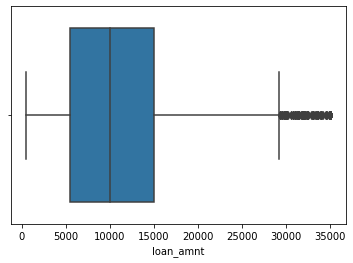

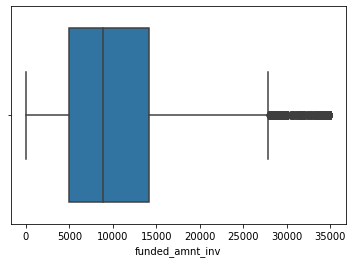

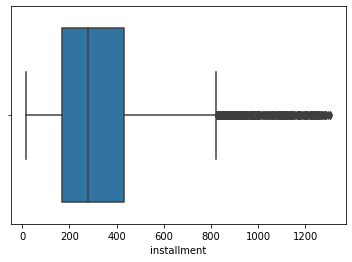

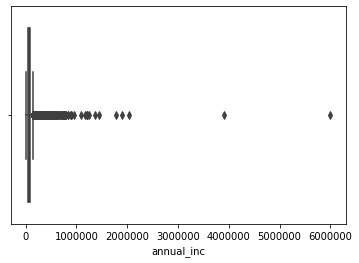

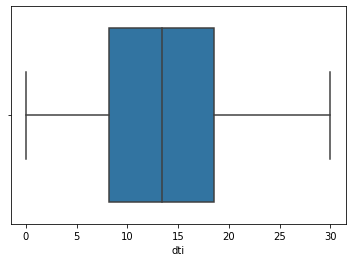

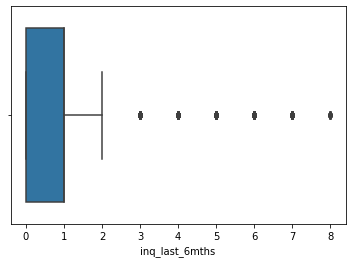

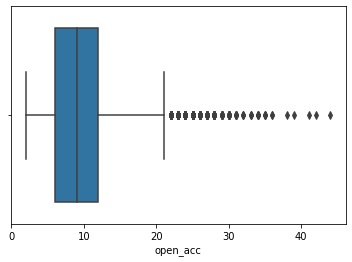

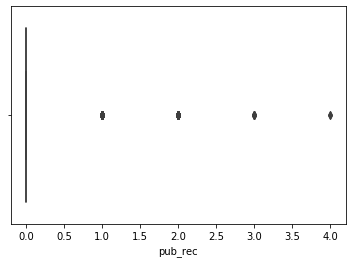

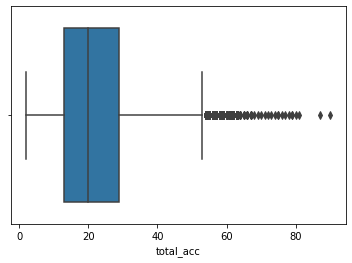

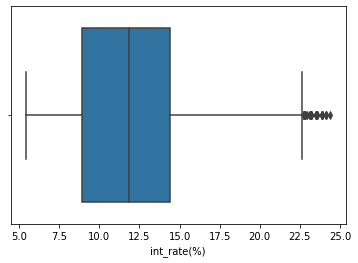

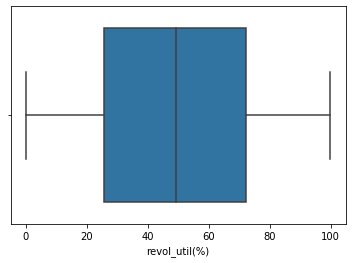

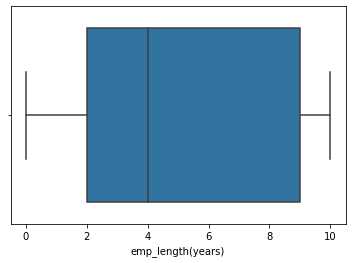

In [29]:
#Individual Boxplot to check outliers in each feature

df_num=df.select_dtypes(include=np.number)

for i in range(len(df_num.columns)):
    sns.boxplot(df_num.iloc[:,i])
    plt.show()

In [30]:
#Skewness is checked for each feature
df.skew().sort_values(ascending=False)

annual_inc                31.412691
pub_rec                    4.625034
inq_last_6mths             1.380309
term_months                1.172324
installment                1.140440
funded_amnt_inv            1.120766
loan_amnt                  1.067528
open_acc                   1.010235
total_acc                  0.828917
earliest_cr_line_year      0.526707
int_rate(%)                0.291233
emp_length(years)          0.211611
dti                       -0.028863
revol_util(%)             -0.035142
earliest_cr_line_month    -0.183246
issue_date_month          -0.209413
issue_date_year           -1.181404
dtype: float64

Highest value in the annual income: 6000000.0
75% quantile value in the annual income: 83000.0
50% quantile (Mean) value in the annual income: 60000.0

Skewness Before: 31.412691179927656


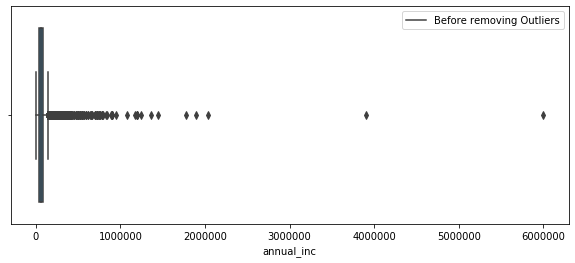

Skewness After: 1.3767996665489177


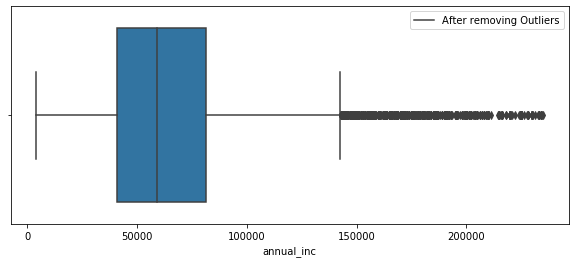

In [31]:
#From the above boxplot & skewness values,  
# we should treat outliers in each feature having high skewness individually

# Looking upon the quantile values of each features, we will treat outliers for the some features

#Outlier treatment for Annual income
print('Highest value in the annual income:',df['annual_inc'].max())
print('75% quantile value in the annual income:',df['annual_inc'].quantile(0.75))
print('50% quantile (Mean) value in the annual income:',df['annual_inc'].quantile(0.50))

#Before removing outliers
print('\nSkewness Before:',df['annual_inc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['annual_inc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()

#We will remove the values which lies between quantile 99% to 100%
df=df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]
plt.figure(figsize=(10,4))
sns.boxplot(df['annual_inc'])
print('Skewness After:',df['annual_inc'].skew())
plt.legend(labels=['After removing Outliers'])
plt.show()

Highest value in the total_acc: 90
75% quantile value in the total_acc: 29.0
50% quantile (Mean) value in the total_acc: 20.0

Skewness Before: 0.8303188383819006


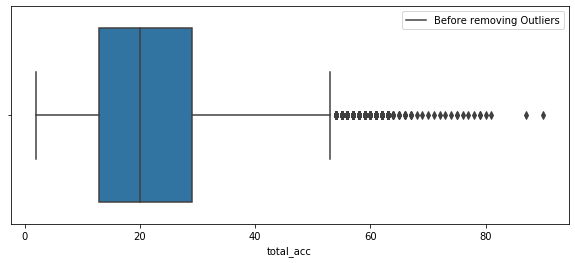

Skewness After: 0.48670959565262994


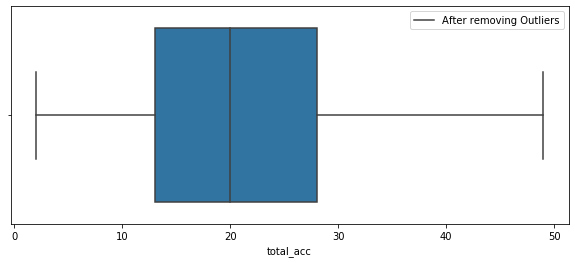

In [32]:
#total_acc:The total number of credit lines currently in the borrower's credit file
print('Highest value in the total_acc:',df['total_acc'].max())
print('75% quantile value in the total_acc:',df['total_acc'].quantile(0.75))
print('50% quantile (Mean) value in the total_acc:',df['total_acc'].quantile(0.50))

#Before removing outliers
print('\nSkewness Before:',df['total_acc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['total_acc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()

#We will remove the values which lies between quantile 98% to 100%
df=df[df['total_acc'] < df['total_acc'].quantile(0.98)]
plt.figure(figsize=(10,4))
sns.boxplot(df['total_acc'])
plt.legend(labels=['After removing Outliers'])
print('Skewness After:',df['total_acc'].skew())
plt.show()

In [33]:
df.shape

(36236, 26)

Highest value in the open_acc: 35
75% quantile value in the open_acc: 11.0
50% quantile (Mean) value in the open_acc: 8.0

Skewness Before: 0.8519318870968804


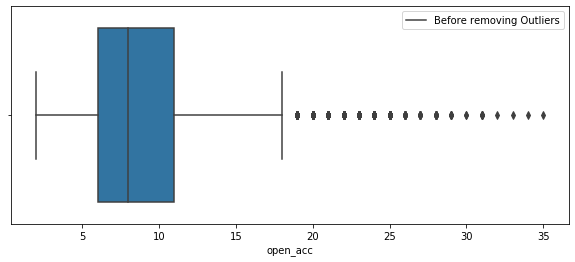

Skewness After: 0.768408679286479


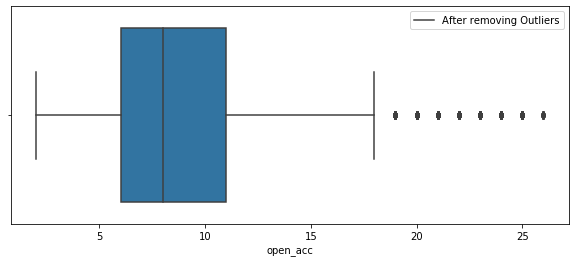

In [34]:
#open_acc : The number of open credit lines in the borrower's credit file.
print('Highest value in the open_acc:',df['open_acc'].max())
print('75% quantile value in the open_acc:',df['open_acc'].quantile(0.75))
print('50% quantile (Mean) value in the open_acc:',df['open_acc'].quantile(0.50))

#Before removing outliers
print('\nSkewness Before:',df['open_acc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['open_acc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()


#We will remove the values which lies between quantile 99.9% to 100%
df=df[df['open_acc'] < df['open_acc'].quantile(0.999)]
plt.figure(figsize=(10,4))
sns.boxplot(df['open_acc'])
plt.legend(labels=['After removing Outliers'])
print('Skewness After:',df['open_acc'].skew())
plt.show()

In [35]:
#Final shape of dataset after removing outliers and using this visualisation purpose
df.shape

(36194, 26)

In [36]:
df.skew()

loan_amnt                 1.076149
funded_amnt_inv           1.124378
installment               1.136801
annual_inc                1.391539
dti                      -0.026736
inq_last_6mths            1.370019
open_acc                  0.768409
pub_rec                   4.580857
total_acc                 0.486365
term_months               1.184732
int_rate(%)               0.283302
revol_util(%)            -0.043569
emp_length(years)         0.227117
earliest_cr_line_month   -0.184769
earliest_cr_line_year     0.493717
issue_date_month         -0.208025
issue_date_year          -1.181874
dtype: float64

In [37]:
#From the above observation we can see that the column pub_rec is a categorical. So outlier treatment cannot be done
df['pub_rec'].value_counts()

0    34280
1     1861
2       44
3        7
4        2
Name: pub_rec, dtype: int64

In [38]:
#Reset Index
df.reset_index(drop=True,inplace=True)
df.head()

loan_amnt  funded_amnt_inv  installment grade sub_grade home_ownership  \
0       5000           4975.0       162.87     B        B2           RENT   
1       2500           2500.0        59.83     C        C4           RENT   
2       2400           2400.0        84.33     C        C5           RENT   
3      10000          10000.0       339.31     C        C1           RENT   
4       5000           5000.0       156.46     A        A4           RENT   

   annual_inc verification_status  loan_status         purpose addr_state  \
0     24000.0            Verified   Fully Paid     credit_card         AZ   
1     30000.0     Source Verified  Charged Off             car         GA   
2     12252.0        Not Verified   Fully Paid  small_business         IL   
3     49200.0     Source Verified   Fully Paid           other         CA   
4     36000.0     Source Verified   Fully Paid         wedding         AZ   

     dti  inq_last_6mths  open_acc  pub_rec  total_acc term_months  \
0  27.65               1         3        0          9         36    
1   1.00               5         3        0          4         60    
2   8.72               2         2        0         10         36    
3  20.00               1        10        0         37         36    
4  11.20               3         9        0         12         36    

   int_rate(%)  revol_util(%)  emp_length(years) earliest_cr_line_date  \
0        10.65           83.7                 10            1985-01-01   
1        15.27            9.4                  0            1999-04-01   
2        15.96           98.5                 10            2021-11-01   
3        13.49           21.0                 10            1996-02-01   
4         7.90           28.3                  3            2021-11-01   

  earliest_cr_line_month earliest_cr_line_year issue_date issue_date_month  \
0                     01                  1985 2011-12-01               12   
1                     04                  1999 2011-12-01               12   
2                     11                  2021 2011-12-01               12   
3                     02                  1996 2011-12-01               12   
4                     11                  2021 2011-12-01               12   

  issue_date_year  
0            2011  
1            2011  
2            2011  
3            2011  
4            2011

In [39]:
df['earliest_cr_line_month']=df['earliest_cr_line_month'].astype('int64')
df['earliest_cr_line_year']=df['earliest_cr_line_year'].astype('int64')

In [40]:
df['issue_date_month']=df['issue_date_month'].astype('int64')
df['issue_date_year']=df['issue_date_year'].astype('int64')

In [41]:
df['pub_rec']=df['pub_rec'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36194 entries, 0 to 36193
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               36194 non-null  int64         
 1   funded_amnt_inv         36194 non-null  float64       
 2   installment             36194 non-null  float64       
 3   grade                   36194 non-null  object        
 4   sub_grade               36194 non-null  object        
 5   home_ownership          36194 non-null  object        
 6   annual_inc              36194 non-null  float64       
 7   verification_status     36194 non-null  object        
 8   loan_status             36194 non-null  object        
 9   purpose                 36194 non-null  object        
 10  addr_state              36194 non-null  object        
 11  dti                     36194 non-null  float64       
 12  inq_last_6mths          36194 non-null  int64 

## Copy of dataset till data cleaning

In [42]:
#We will use this df_after_data_cleaning dataset after EDA part again
df_after_data_cleaning=df.copy()

# UNIVARIATE & BIVARIATE ANALYSIS

### Categorical variables present after data cleaning

In [43]:
df.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'term_months'],
      dtype='object')

### Numerical variables present after data cleaning

In [44]:
df.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'int_rate(%)',
       'revol_util(%)', 'emp_length(years)', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_date_month', 'issue_date_year'],
      dtype='object')

## Distribution of Target variable

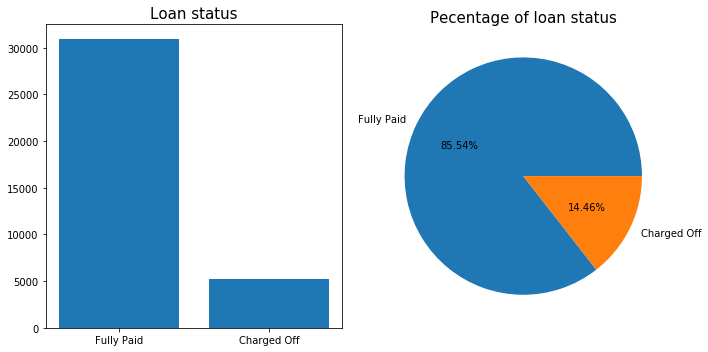

In [45]:
# # Target variable

fig,axes=plt.subplots(1,2,figsize=(10,5))
d1=df['loan_status'].value_counts()
axes[0].bar(d1.index,d1.values)
axes[1].pie(d1.values,labels=d1.index,autopct='%0.2f%%')
axes[0].set_title('Loan status',fontsize=15)
axes[1].set_title('Pecentage of loan status',fontsize=15)
plt.tight_layout()
plt.show()

1. From the above plot , we ca say that 14.46 % people are the loan defaulters.
2. There are around 5232 people of total 36194 people who are loan defaulters.

## Convert target variable into numerical variable

In [46]:
# target variable converted into 1's & 0''s
# loan defaulters are charged off people therefore charged off=1
# 0 : Fully paid
# 1 : Charged off

df['loan_status']=df['loan_status'].replace({'Fully Paid':0,'Charged Off':1})


## Loan Purpose

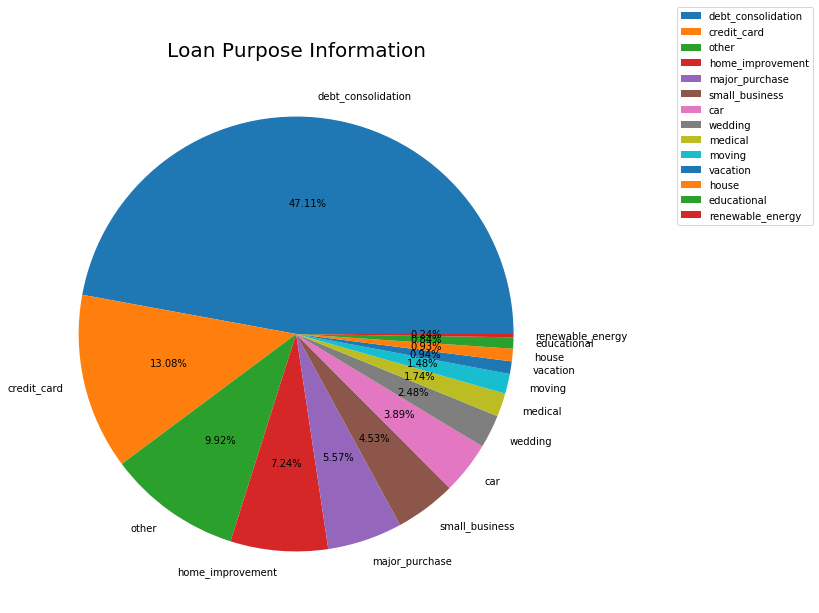

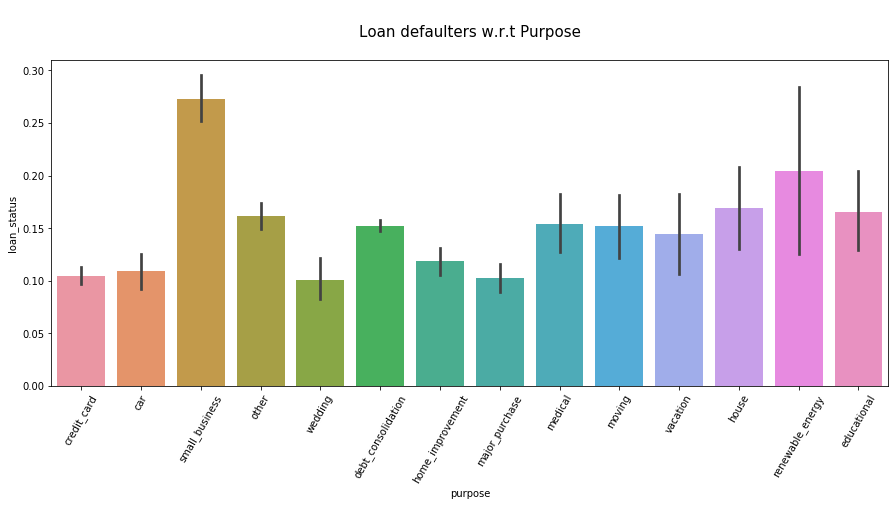

In [47]:
# Loan purpose Vs Loan defaulters

count=df['purpose'].value_counts()
labels=count.index
values=count.values

#Percentage of loan purpose
plt.figure(figsize=(12,10))
plt.pie(x=values,labels=labels,autopct='%0.2f%%')
plt.title('\nLoan Purpose Information',fontsize=20)
plt.legend(labels=labels , loc=(1.2,0.7))
plt.show()


#Loan defaults w.r.t Purpose of loan
plt.figure(figsize=(15,6))
sns.barplot(x=df['purpose'] ,y=df['loan_status'])
plt.title('\nLoan defaulters w.r.t Purpose\n',fontsize=15)
plt.xticks(rotation=60)

plt.show()

1. Loans are taken for majority for debt consolidation, Other,Home improvement , major purchase & small buisiness purpose.
2. From the bar plot, we can observe that the probability of persong being loan defaulter is more in small buisiness,
Defaulter rate is more when person take loan for small business purpose.
3. Defaulter Rate will depend on the Purpose of the loan

## Term

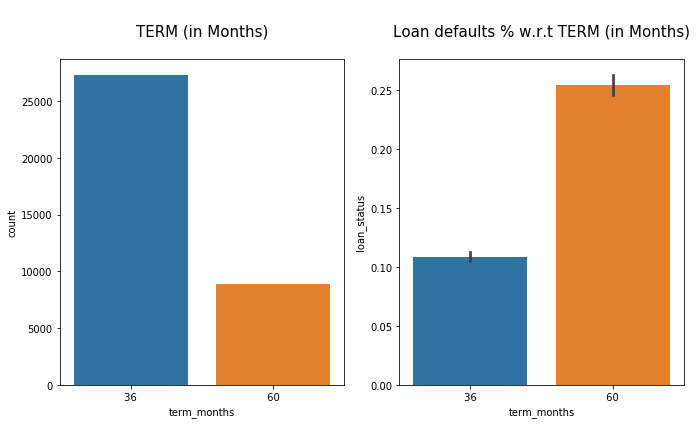

In [48]:
# Term vs loan defaulters
fig,ax=plt.subplots(1,2  , figsize=(10,6))

#Countplot for Term
sns.countplot(df['term_months'] ,ax=ax[0] )
#Loan defaults vs term
sns.barplot(x=df['term_months'] ,y=df['loan_status'] ,ax=ax[1])
ax[0].set_title('\nTERM (in Months)\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t TERM (in Months)\n',fontsize=15)
fig.tight_layout()


1. In the givan dataset, we are having more number of people with term 36 months than 60 months.
2. But The probability of loan getting defaulted is more for 60 months than 30 months.

## Grade

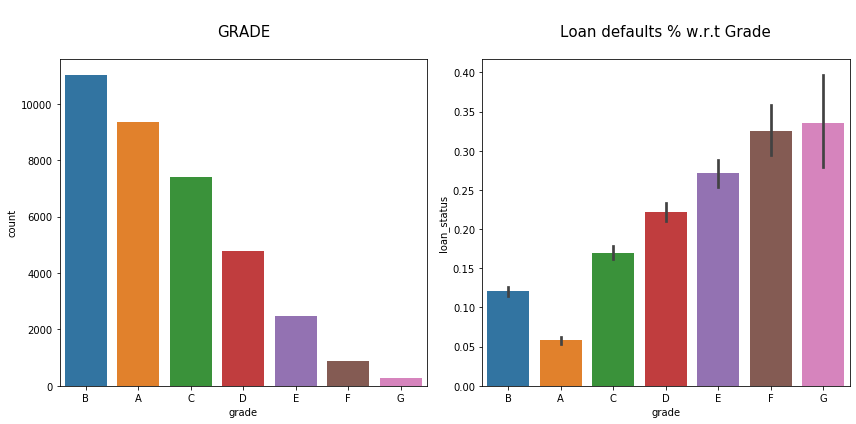

In [49]:
#Grade 

fig,ax=plt.subplots(1,2 , figsize=(12,6))
# Countplot for grade
sns.countplot(df['grade'] ,ax=ax[0] ,order=df['grade'].value_counts().index)
# Barplot for loan defaults vs grade
sns.barplot(x=df['grade'] ,y =df['loan_status'] ,ax=ax[1] ,order=df['grade'].value_counts().index)
ax[0].set_title('\nGRADE\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Grade\n',fontsize=15)
fig.tight_layout()

1. There are more number of people with grade B.
2. Defaulter rate is high with the grade G and less for grade A.

## Sub-Grade

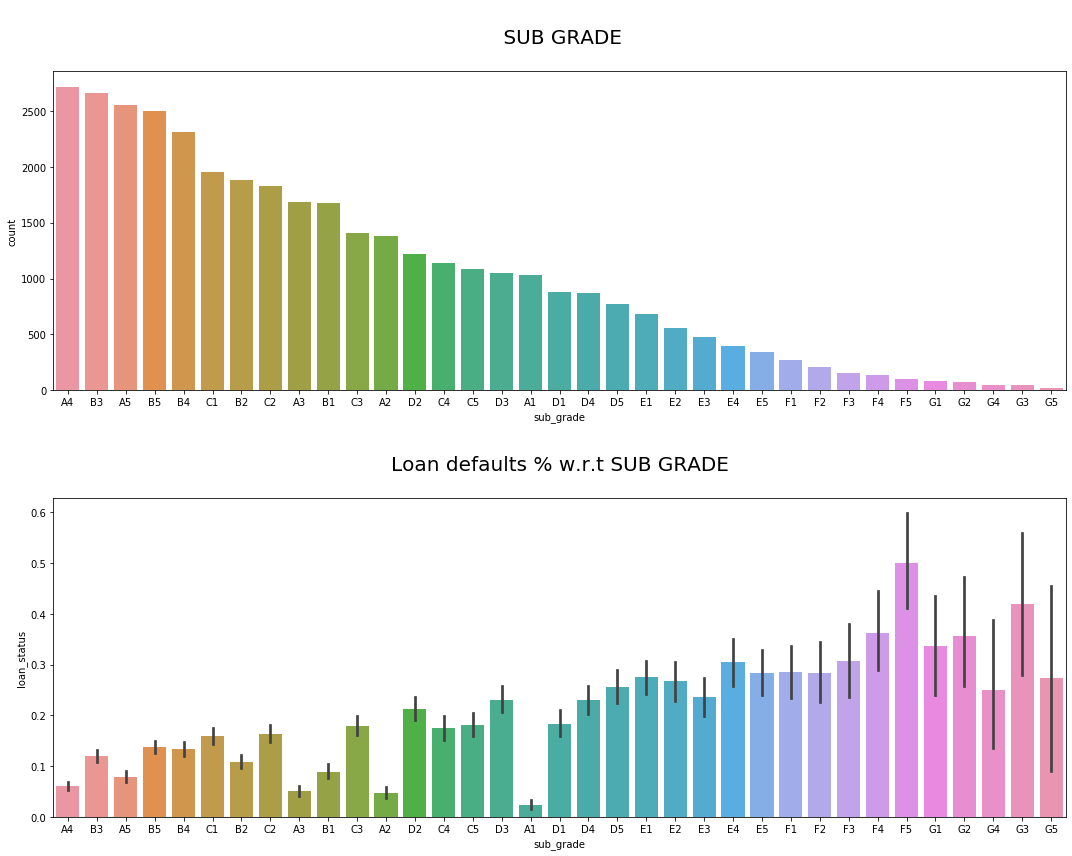

In [50]:
# check for defaulters wrt subgrade in the data using countplot

#Countplot for sub grade
fig,ax=plt.subplots(2,1  , figsize=(15,12))
sns.countplot(x=df['sub_grade'] ,ax=ax[0],order=df['sub_grade'].value_counts().index)
#Loan defaulter vs sub grade
sns.barplot(x=df['sub_grade'] ,y=df['loan_status'] ,ax=ax[1] ,order=df['sub_grade'].value_counts().index)
ax[0].set_title('\n SUB GRADE\n',fontsize=20)
ax[1].set_title('\nLoan defaults % w.r.t SUB GRADE\n',fontsize=20)
plt.tight_layout()
plt.show()

1. There are more number of people with sub grade A4.
2. Defaulter rate is increasing with the sub grade , loan defaulter rate is more for F5 grade  and less for grade A1.
3. Sub Grade is useful for further analysis.

## Home ownership

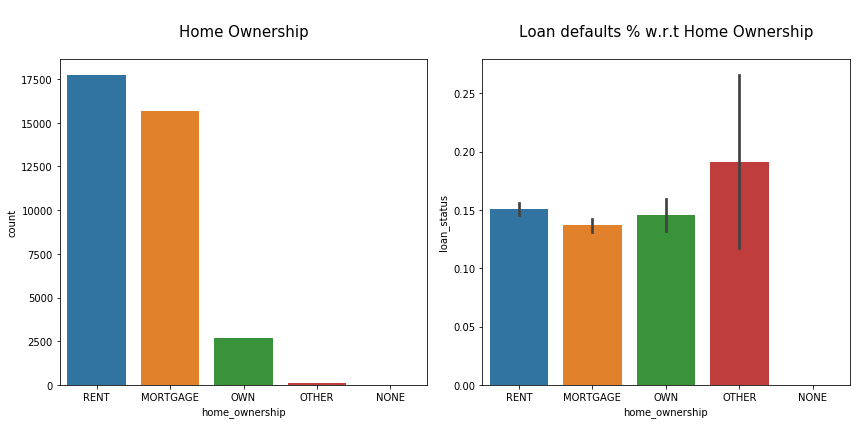

In [51]:
#Home ownership
fig,ax=plt.subplots(1,2  , figsize=(12,6))

#Countplot for home ownership
sns.countplot(df['home_ownership'] ,ax=ax[0] ,order=df['home_ownership'].value_counts().index)
#Barplot for loan defaults vs home ownership
sns.barplot(x=df['home_ownership'] ,y=df['loan_status'] ,ax=ax[1] ,order=df['home_ownership'].value_counts().index)
ax[0].set_title('\nHome Ownership\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Home Ownership\n',fontsize=15)
plt.tight_layout()

1. Loan defaulter rate is almost constant for all the home ownerships, slightly more for OTHER home ownership.
2. We can say that loan defaulters does not depends on home ownership.
3. Home ownership is not useful for further analysis.

In [52]:
#Check for values count
df['home_ownership'].value_counts()

RENT        17747
MORTGAGE    15679
OWN          2673
OTHER          94
NONE            1
Name: home_ownership, dtype: int64

In [53]:
# we will remove home ownership NONE
#Since Only one record is present for None category
df=df[df['home_ownership']!='NONE']

#Again check for value counts 
#df['home_ownership'].value_counts()

## Verification Status

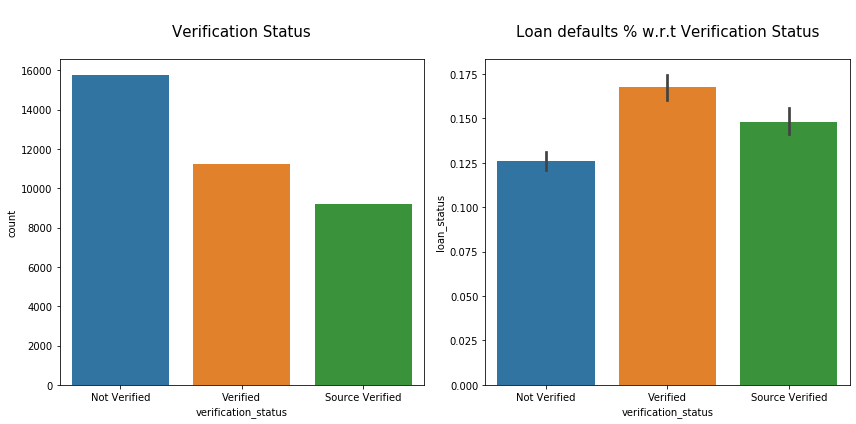

In [54]:
#Verification status
fig,ax=plt.subplots(1,2  , figsize=(12,6))

sns.countplot(df['verification_status'] ,ax=ax[0] ,order=df['verification_status'].value_counts().index)
sns.barplot(x=df['verification_status'] ,y=df['loan_status'] ,ax=ax[1] ,order=df['verification_status'].value_counts().index)
ax[0].set_title('\nVerification Status\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Verification Status\n',fontsize=15)
plt.tight_layout()
plt.show()

1. In the given data ,There are more records for which the ststus is non verified.
2. but the defaulter rate is more for verified status.

# Numerical variables

In [55]:
df.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
       'loan_status', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'int_rate(%)', 'revol_util(%)', 'emp_length(years)',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'issue_date_month',
       'issue_date_year'],
      dtype='object')

## Interest rate

In [56]:
#We have seen the distribution of intrest rate
df['int_rate(%)'].describe()

count    36193.000000
mean        11.929499
std          3.655874
min          5.420000
25%          8.940000
50%         11.830000
75%         14.350000
max         24.400000
Name: int_rate(%), dtype: float64

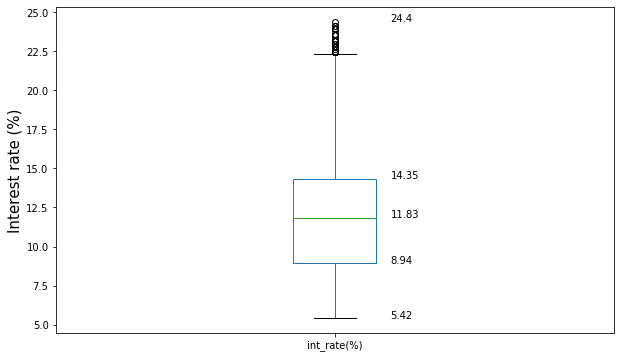

In [57]:
#Boxplot for interest rate
plt.figure(figsize=(10,6))
df['int_rate(%)'].plot(kind='box')
plt.text(1.1, df['int_rate(%)'].max() , s=df['int_rate(%)'].max())
plt.text(1.1, df['int_rate(%)'].min() , s=df['int_rate(%)'].min())
plt.text(1.1, df['int_rate(%)'].quantile(0.25) , s=df['int_rate(%)'].quantile(0.25))
plt.text(1.1, df['int_rate(%)'].quantile(0.50) , s=df['int_rate(%)'].quantile(0.50))
plt.text(1.1, df['int_rate(%)'].quantile(0.75) , s=df['int_rate(%)'].quantile(0.75))
plt.ylabel('Interest rate (%)',fontsize=15)
plt.show()
plt.show()

1. The median intrest rate is 11.83% ,the lowesr intrest rate is 5.42 &  the hoghest intrest rate is 24.4.


In [58]:
# Divide interest rate into groups based on intervals
df['int_rate_cat']=pd.cut(df['int_rate(%)'],  [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

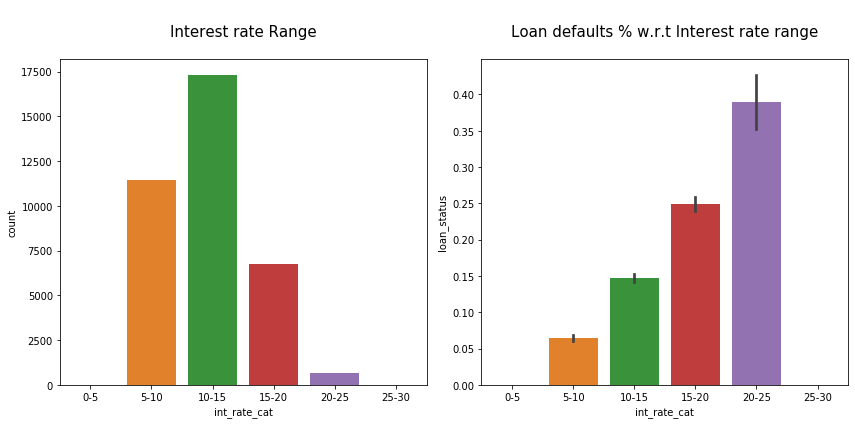

In [59]:
#Interest rate

fig,ax=plt.subplots(1,2  , figsize=(12,6))
#Countplot for intrest rate categories
sns.countplot(df['int_rate_cat'] ,ax=ax[0] )
#Barplot for loan defaulters vs intrest rate categories
sns.barplot(x=df['int_rate_cat'] ,y=df['loan_status'] ,ax=ax[1] )
ax[0].set_title('\nInterest rate Range\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Interest rate range\n',fontsize=15)
plt.tight_layout()
plt.show()

1. There are more records with intrest rate between 10-15%
2. The rate of loan defaulter is more for highest intrest rate & less for lowest intrest rate.

## Annual income

In [60]:
#We have seen the distribution of intrest rate
df['annual_inc'].describe()

count     36193.000000
mean      65289.993599
std       34718.161704
min        4000.000000
25%       40056.000000
50%       58000.000000
75%       80000.000000
max      234996.000000
Name: annual_inc, dtype: float64

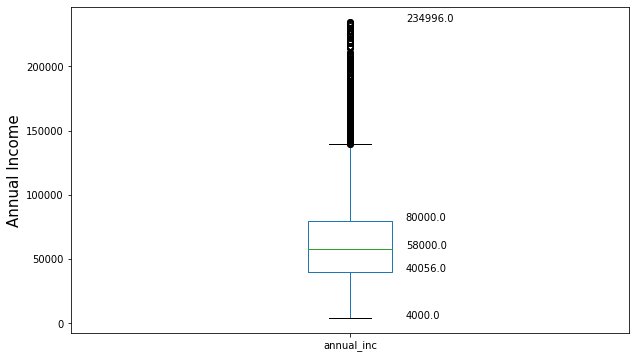

In [61]:
#Boxplot for annual income
plt.figure(figsize=(10,6))
df['annual_inc'].plot(kind='box')

plt.text(1.1, df['annual_inc'].max() , s=df['annual_inc'].max())
plt.text(1.1, df['annual_inc'].min() , s=df['annual_inc'].min())
plt.text(1.1, df['annual_inc'].quantile(0.25) , s=df['annual_inc'].quantile(0.25))
plt.text(1.1, df['annual_inc'].quantile(0.50) , s=df['annual_inc'].quantile(0.50))
plt.text(1.1, df['annual_inc'].quantile(0.75) , s=df['annual_inc'].quantile(0.75))

plt.ylabel('Annual Income',fontsize=15)
plt.show()
plt.show()

1. The median income is 58000 ,the minum income is 4000 & the maximum income is 234996.

In [62]:
# Divide annual income into groups based on intervals
def annual_income(inc):
    if inc <= 50000:
        return 'low'
    elif inc > 50000 and inc <=100000:
        return 'medium'
    elif inc > 100000 and inc <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc_cat'] = df['annual_inc'].apply(lambda x: annual_income(x))
df['annual_inc_cat'].value_counts()

medium       16941
low          14502
high          3748
very high     1002
Name: annual_inc_cat, dtype: int64

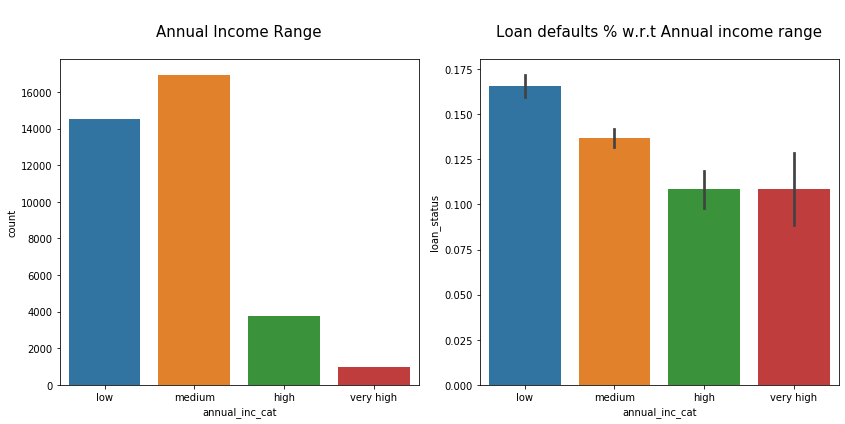

In [63]:
fig,ax=plt.subplots(1,2  , figsize=(12,6))
#Countplot for annual income range
sns.countplot(df['annual_inc_cat'] ,ax=ax[0] )
#Loan defaulter Vs annual income range
sns.barplot(x=df['annual_inc_cat'] ,y=df['loan_status'] ,ax=ax[1] )
ax[0].set_title('\nAnnual Income Range\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Annual income range\n',fontsize=15)
plt.tight_layout()
plt.show()

1. Defaulter rate is increasing with the annual income value, defaulter rate will depend on loan amount
2. The annual income variable is useful for further analysis.

## Loan amount

In [64]:
df['loan_amnt'].describe()

count    36193.000000
mean     10986.472522
std       7240.471992
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

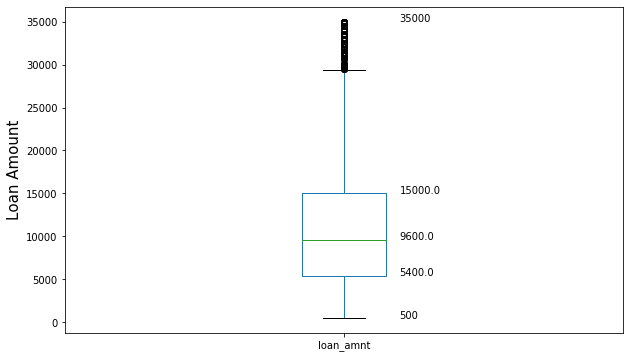

In [65]:
#Boxplot for loan amount
plt.figure(figsize=(10,6))
df['loan_amnt'].plot(kind='box')

plt.text(1.1, df['loan_amnt'].max() , s=df['loan_amnt'].max())
plt.text(1.1, df['loan_amnt'].min() , s=df['loan_amnt'].min())
plt.text(1.1, df['loan_amnt'].quantile(0.25) , s=df['loan_amnt'].quantile(0.25))
plt.text(1.1, df['loan_amnt'].quantile(0.50) , s=df['loan_amnt'].quantile(0.50))
plt.text(1.1, df['loan_amnt'].quantile(0.75) , s=df['loan_amnt'].quantile(0.75))

plt.ylabel('Loan Amount',fontsize=15)
plt.show()
plt.show()

The median loan amount is 9600 , the minimum loan amount is 500, the maximum loan amount is 35000

In [66]:
# Divide Loan amount into groups based on intervals
def loan_amount(amt):
    if amt <= 5500:
        return 'low'
    elif amt > 5500 and amt <=10000:
        return 'medium'
    elif amt > 10000 and amt <=15000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt_cat'] = df['loan_amnt'].apply(lambda x: loan_amount(x))
df['loan_amnt_cat'].value_counts()

medium       11607
low           9339
very high     7949
high          7298
Name: loan_amnt_cat, dtype: int64

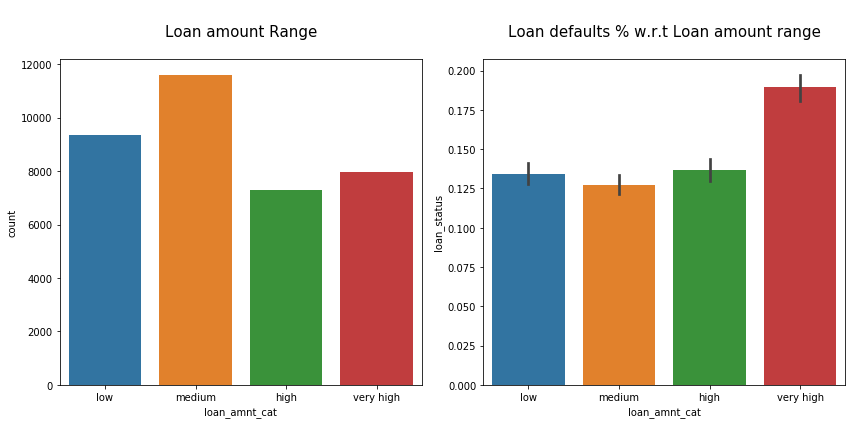

In [67]:
#Loan amount
fig,ax=plt.subplots(1,2  , figsize=(12,6))

#Countplot for loan amount range
sns.countplot(df['loan_amnt_cat'] ,ax=ax[0] )
#barplot for loan defaulters Vs loan amount range
sns.barplot(x=df['loan_amnt_cat'] ,y=df['loan_status'] ,ax=ax[1] )
ax[0].set_title('\nLoan amount Range\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Loan amount range\n',fontsize=15)
plt.tight_layout()
plt.show()

1. loan defaulter rate is increasing as loan amount range .
2. This feature is useful for further analysis

## Debt to Income ratio

In [68]:
df['dti'].describe()

count    36193.000000
mean        13.288992
std          6.644887
min          0.000000
25%          8.170000
50%         13.390000
75%         18.530000
max         29.990000
Name: dti, dtype: float64

In [69]:
# Divide interest rate into groups based on intervals
df['dti_cat']=pd.cut(df['dti'],  [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
#df.head()

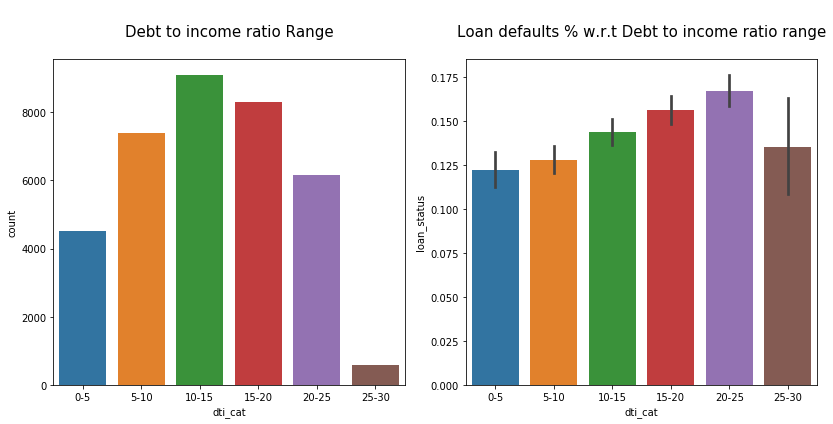

In [70]:
#Debt to income ratio

fig,ax=plt.subplots(1,2  , figsize=(12,6))

sns.countplot(df['dti_cat'] ,ax=ax[0] )
sns.barplot(x=df['dti_cat'] ,y=df['loan_status'] ,ax=ax[1] )
ax[0].set_title('\nDebt to income ratio Range\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Debt to income ratio range\n',fontsize=15)
plt.tight_layout()
plt.show()

1. Loan defaulter rate is increasing with the debt to income ratio.
2. Dti is useful for finding the loan defaulter.

## Revolving line utilization rate

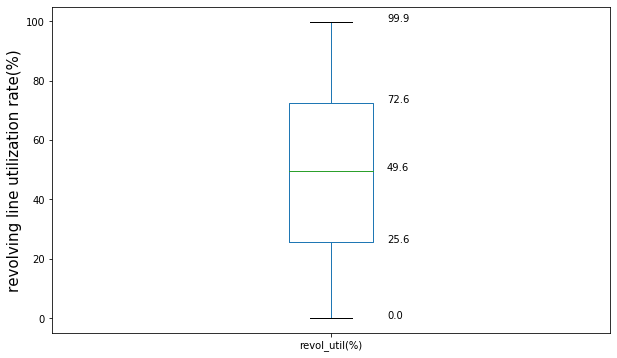

In [71]:
#Boxplot for revol_util
plt.figure(figsize=(10,6))
df['revol_util(%)'].plot(kind='box')

plt.text(1.1, df['revol_util(%)'].max() , s=df['revol_util(%)'].max())
plt.text(1.1, df['revol_util(%)'].min() , s=df['revol_util(%)'].min())
plt.text(1.1, df['revol_util(%)'].quantile(0.25) , s=df['revol_util(%)'].quantile(0.25))
plt.text(1.1, df['revol_util(%)'].quantile(0.50) , s=df['revol_util(%)'].quantile(0.50))
plt.text(1.1, df['revol_util(%)'].quantile(0.75) , s=df['revol_util(%)'].quantile(0.75))

plt.ylabel('revolving line utilization rate(%)',fontsize=15)
plt.show()
plt.show()

In [72]:
# Divide revol utilization rate into groups based on intervals
df['revol_util_cat']=pd.cut(df['revol_util(%)'],  [0,25,50,75,100], labels=['0-25','25-50','50-75','75-100'])

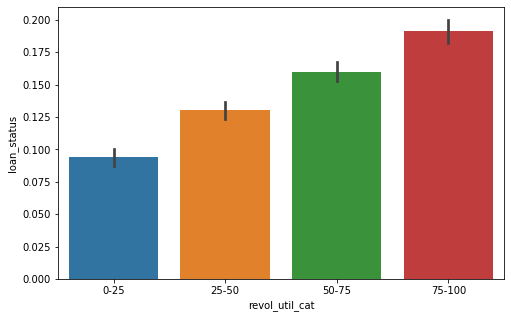

In [73]:
#Loan defaulter vs revol util

plt.figure(figsize=(8,5))
sns.barplot(x=df['revol_util_cat'] ,y=df['loan_status'])
plt.show()

1. Loan defaulter rate is increasing with the revolving line utilization rate.
2. this is useful for finding the loan defaulter.

## Installments

In [74]:
df['installment'].describe()

count    36193.000000
mean       320.756398
std        205.212941
min         15.690000
25%        166.500000
50%        277.530000
75%        422.240000
max       1305.190000
Name: installment, dtype: float64

In [75]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment_cat'] = df['installment'].apply(lambda x: installment(x))

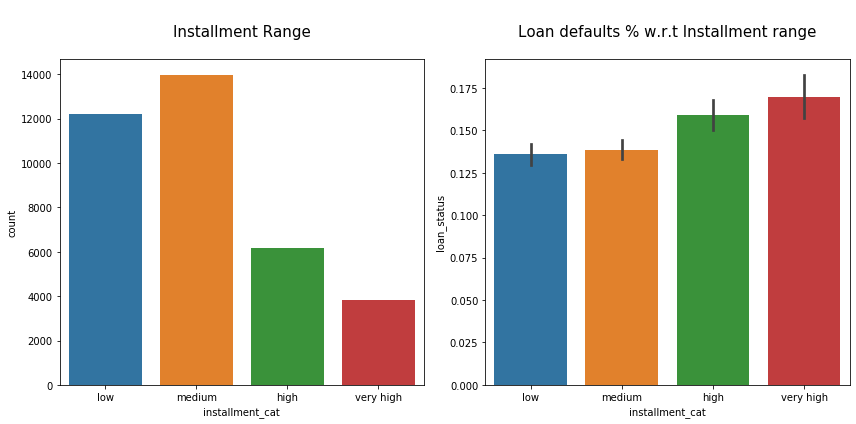

In [76]:
#Loan amount

fig,ax=plt.subplots(1,2  , figsize=(12,6))

sns.countplot(df['installment_cat'] ,ax=ax[0] )
sns.barplot(x=df['installment_cat'] ,y=df['loan_status'] ,ax=ax[1] )
ax[0].set_title('\nInstallment Range\n',fontsize=15)
ax[1].set_title('\nLoan defaults % w.r.t Installment range\n',fontsize=15)
plt.tight_layout()
plt.show()

1. Loan defaulter rate is increasing with the installment values.
2. Dti is useful for finding the loan defaulter.

### Installments Vs Loan amount

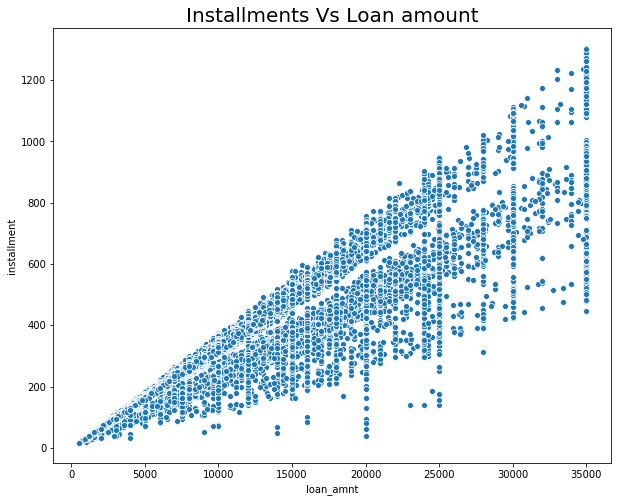

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot( df['loan_amnt'] ,df['installment'] )
plt.title('Installments Vs Loan amount' , fontsize=20)
plt.show()

1. It is obvious that if the loan amount is more, installment amount will also be more

### Annual income VS LOAN AMOUNT

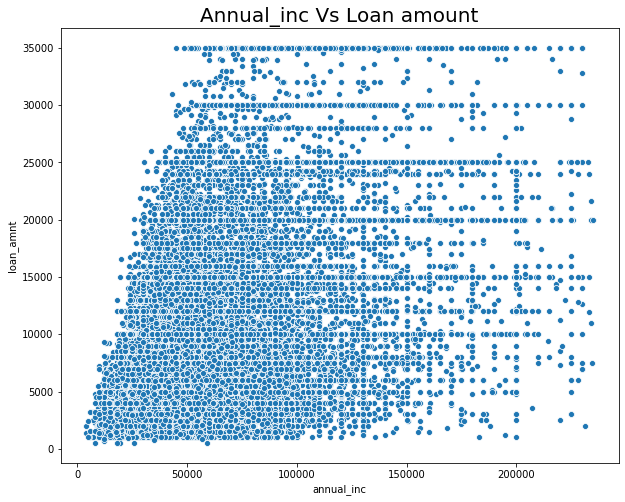

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot( df['annual_inc'] ,df['loan_amnt'])
plt.title('Annual_inc Vs Loan amount' , fontsize=20)
plt.show()

1. People with annual income between 0 to 100000 tend to appply more for loan

# MULTIVARIATE ANALYSIS

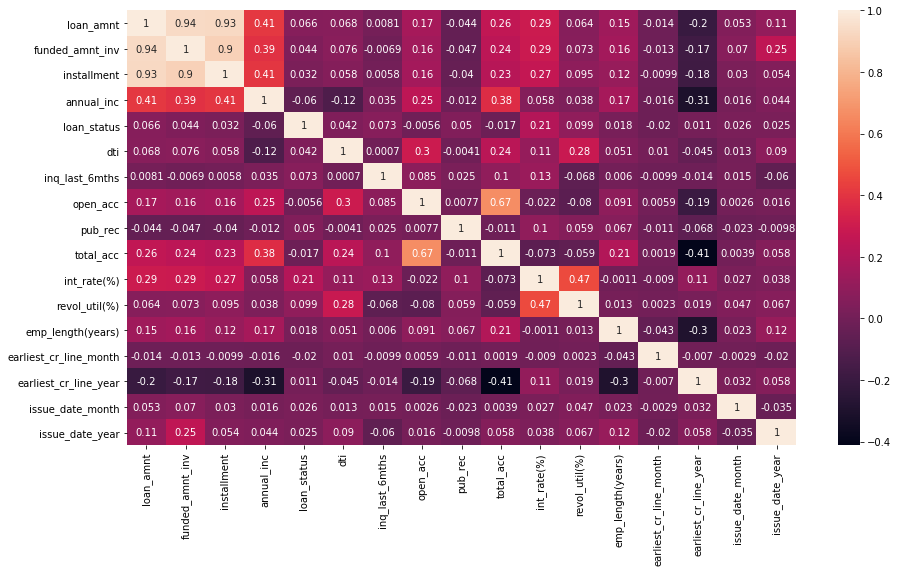

In [79]:
#Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

1. There is a strong correlation between loan amount and funded amount.
2. There is a strong correlation between loan amount and installment.
3. The columns total_acc, open_acc are having high correlation
4. There are few cells having negative correlation

# Pairplot




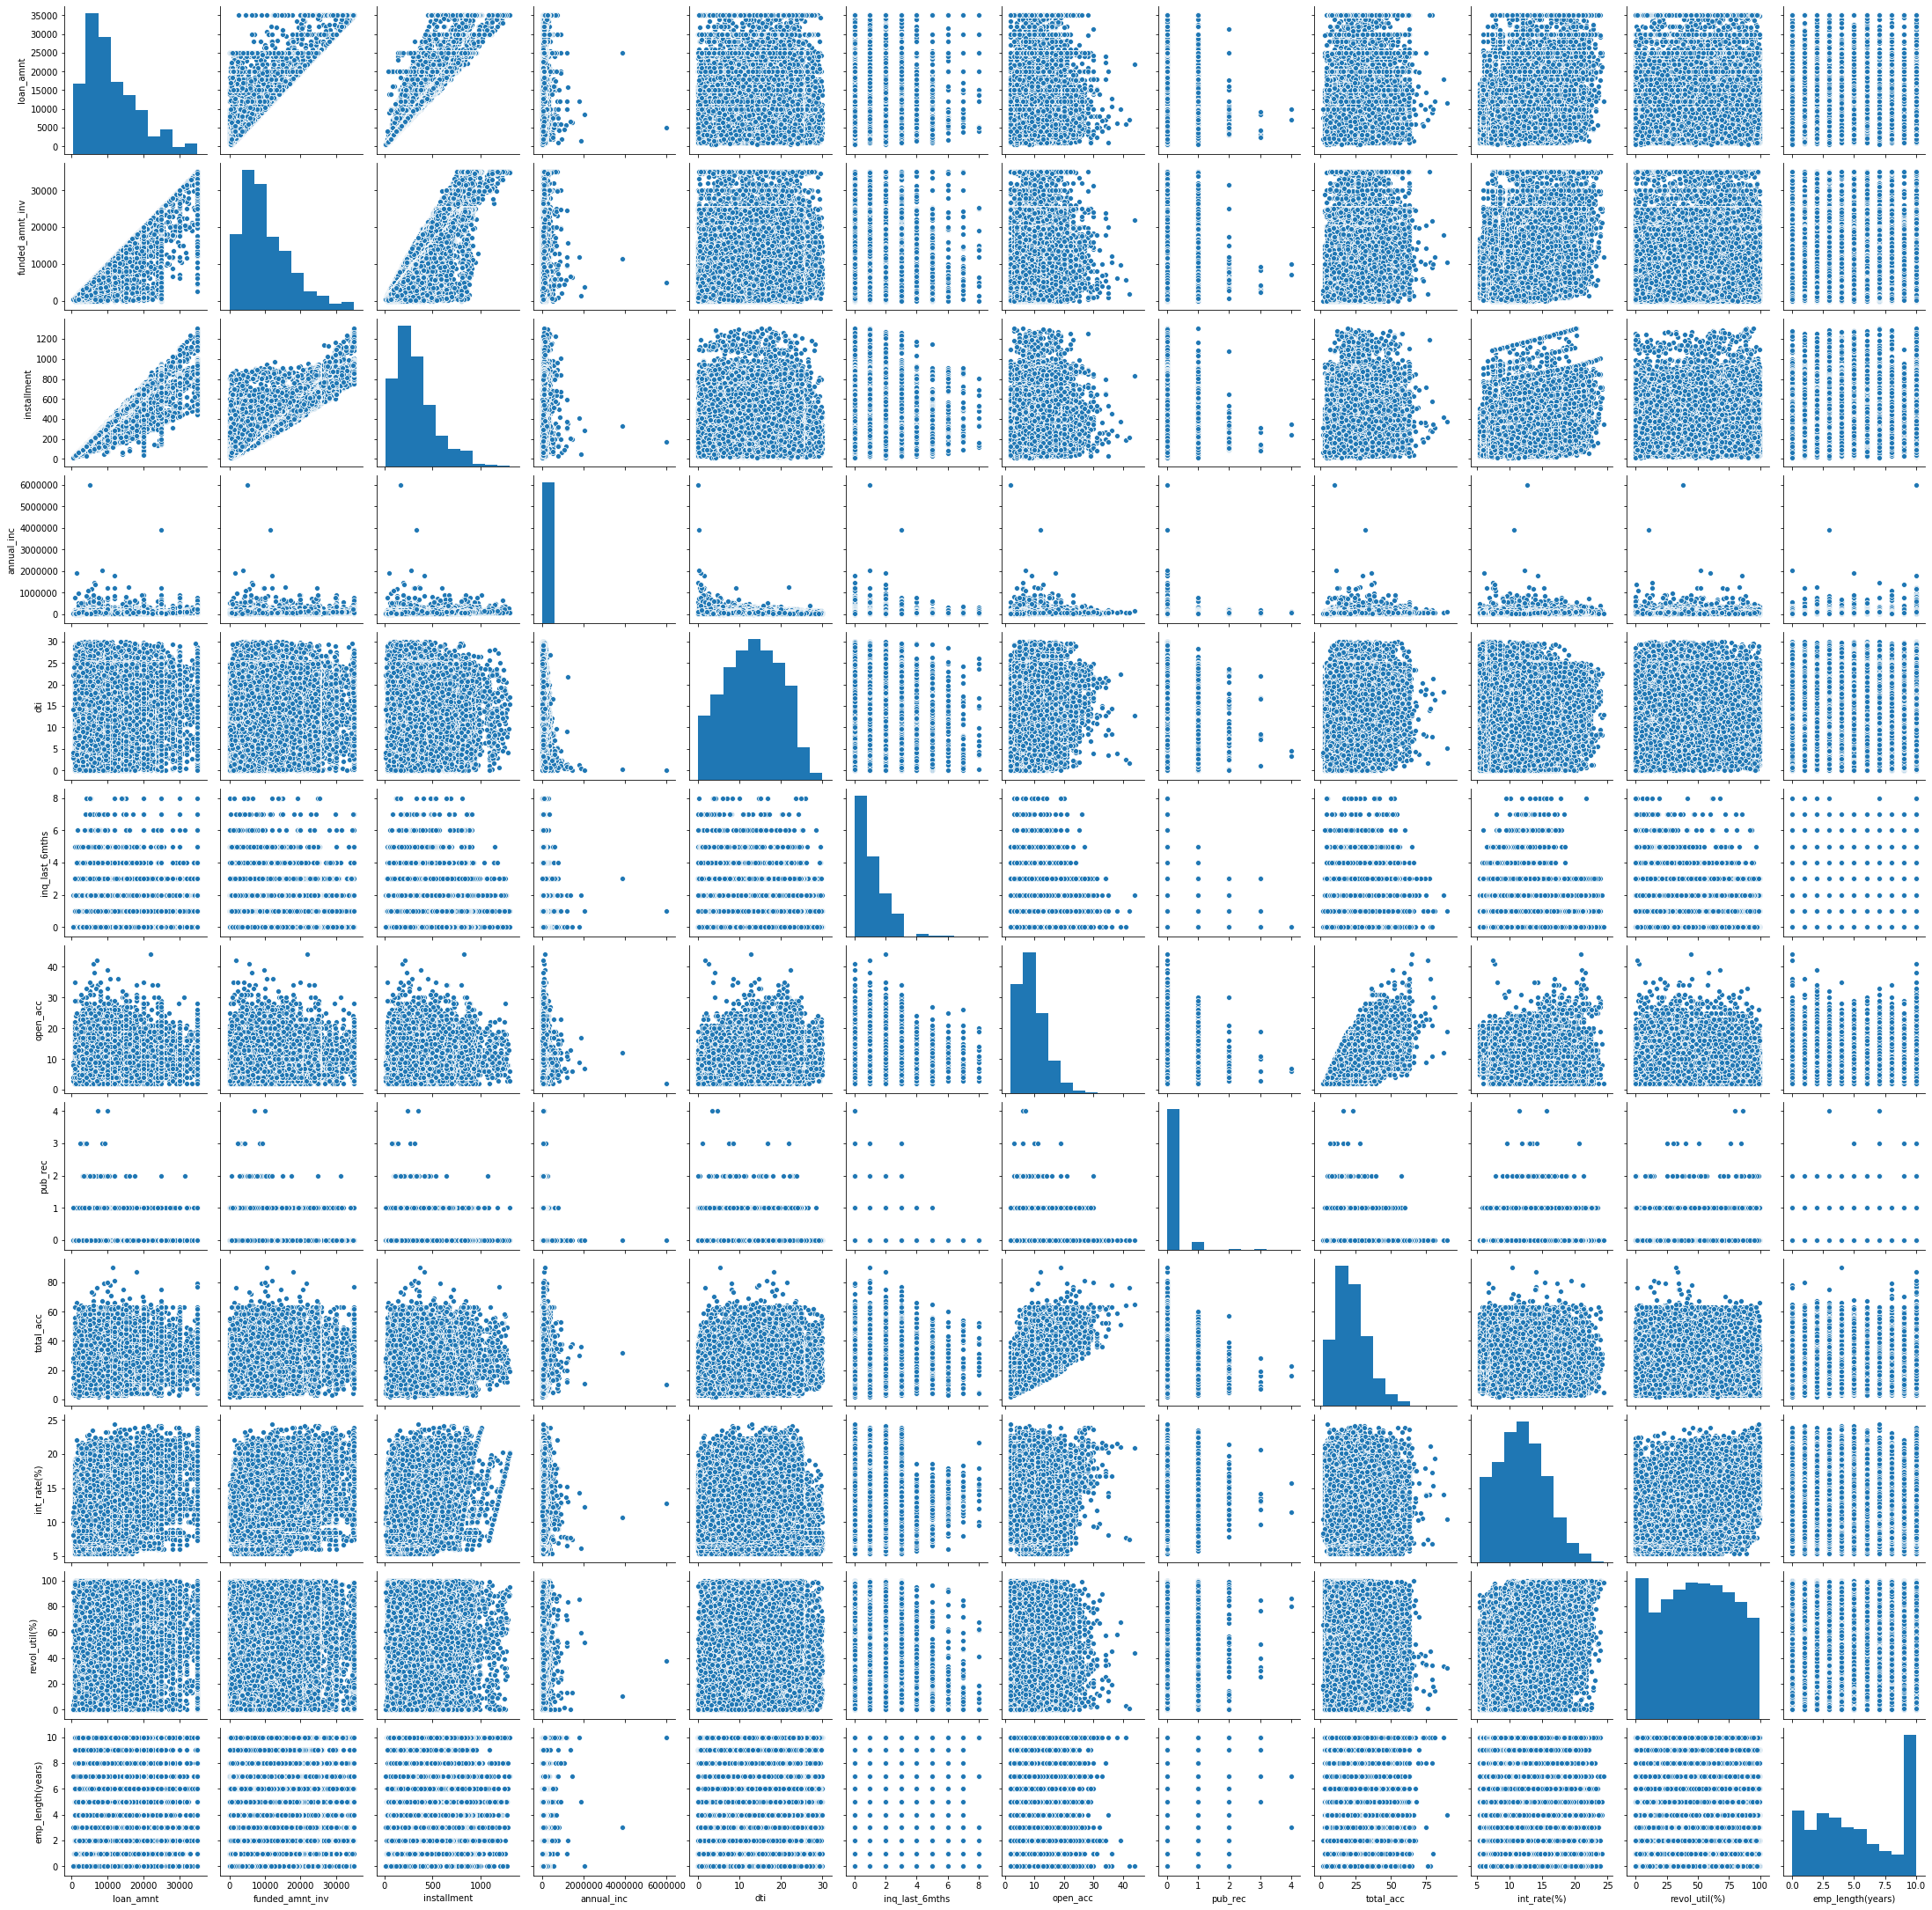

In [80]:
sns.pairplot(df_num)

### Loan amount & Interest rate 

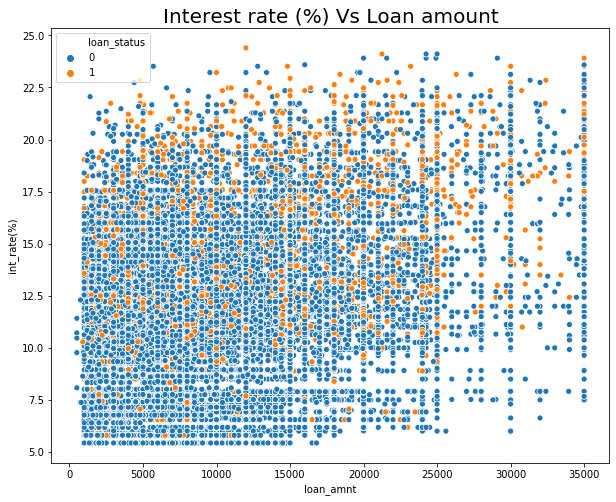

In [81]:
plt.figure(figsize=(10,8))
sns.scatterplot( df['loan_amnt'] ,df['int_rate(%)'] ,hue=df['loan_status'])
plt.title('Interest rate (%) Vs Loan amount' , fontsize=20)
plt.show()

The defaulters are present at all the places

## Loan defaulters w. r. t. Term & Purpose 

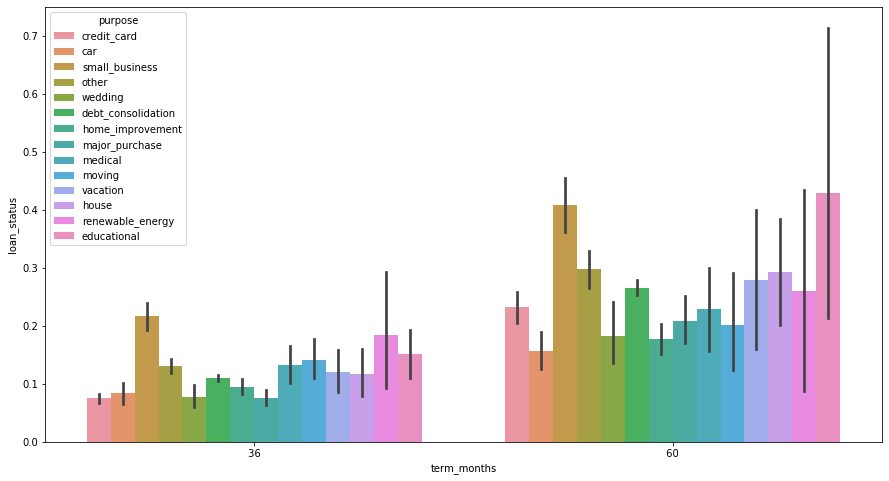

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['term_months'] , y=df['loan_status'] , hue=df['purpose'] )
plt.show()

1. From the above plot, we can infer out that default rate is increases for every purpose w.r.t term.

## Loan defaulters w. r. t. Grade & Purpose 

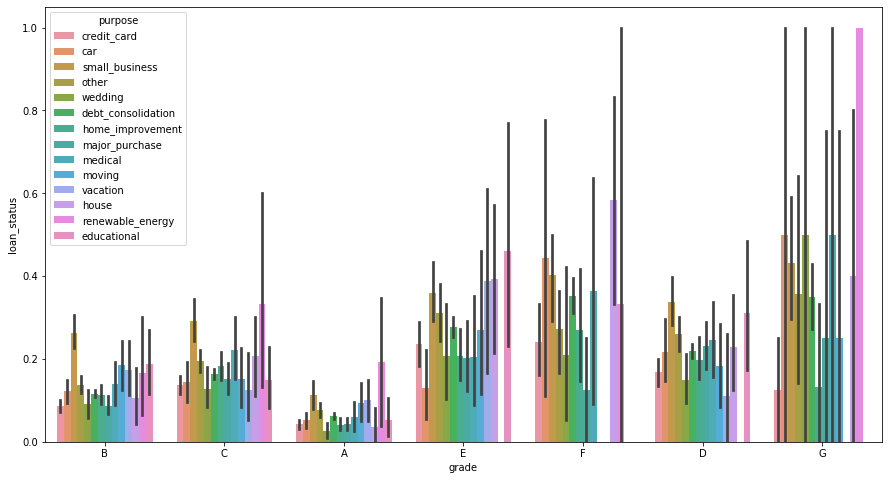

In [83]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['grade'] , y=df['loan_status'] , hue=df['purpose'] )
plt.show()

1. From the above plot, we can infer out that default rate is increases for every purpose w.r.t Grade.
2. The more number of defaulters are present in the Grade G and less in Grade A

## Loan defaulters w. r. t. Term & Loan amount 

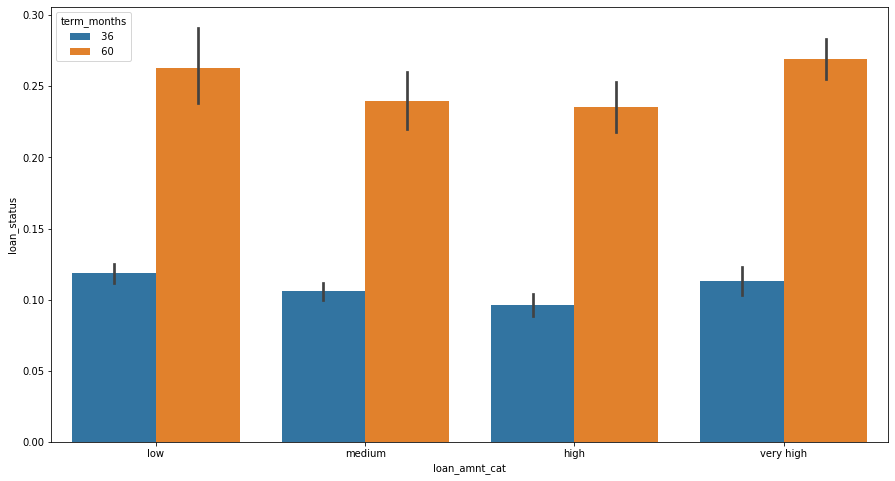

In [84]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['loan_amnt_cat'] , y=df['loan_status'] , hue=df['term_months'] )
plt.show()

1. From the above plot, we can infer out that default rate is increases for loan amount category w.r.t term.

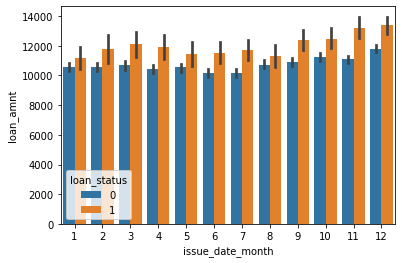

In [85]:
sns.barplot(df['issue_date_month'],df['loan_amnt'],hue=df['loan_status'])

In every month, there are almost equal number of loan defaulters as loan takers

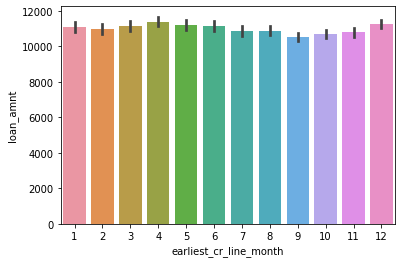

In [86]:
sns.barplot(df['earliest_cr_line_month'],df['loan_amnt'])

The amount issued by the bank is same for all the months

## Save the Dataset till EDA

In [87]:
df_after_EDA=df.copy()

# Important features selected from EDA

The features which are depends on whether the person will be able to repay the loan amount or not are term, grade,sub grade,purpose,revol_util, int_rate, installment, annual income, loan amount.

In [88]:
df_after_EDA.head()

loan_amnt  funded_amnt_inv  installment grade sub_grade home_ownership  \
0       5000           4975.0       162.87     B        B2           RENT   
1       2500           2500.0        59.83     C        C4           RENT   
2       2400           2400.0        84.33     C        C5           RENT   
3      10000          10000.0       339.31     C        C1           RENT   
4       5000           5000.0       156.46     A        A4           RENT   

   annual_inc verification_status  loan_status         purpose addr_state  \
0     24000.0            Verified            0     credit_card         AZ   
1     30000.0     Source Verified            1             car         GA   
2     12252.0        Not Verified            0  small_business         IL   
3     49200.0     Source Verified            0           other         CA   
4     36000.0     Source Verified            0         wedding         AZ   

     dti  inq_last_6mths  open_acc  pub_rec  total_acc term_months  \
0  27.65               1         3        0          9         36    
1   1.00               5         3        0          4         60    
2   8.72               2         2        0         10         36    
3  20.00               1        10        0         37         36    
4  11.20               3         9        0         12         36    

   int_rate(%)  revol_util(%)  emp_length(years) earliest_cr_line_date  \
0        10.65           83.7                 10            1985-01-01   
1        15.27            9.4                  0            1999-04-01   
2        15.96           98.5                 10            2021-11-01   
3        13.49           21.0                 10            1996-02-01   
4         7.90           28.3                  3            2021-11-01   

   earliest_cr_line_month  earliest_cr_line_year issue_date  issue_date_month  \
0                       1                   1985 2011-12-01                12   
1                       4                   1999 2011-12-01                12   
2                      11                   2021 2011-12-01                12   
3                       2                   1996 2011-12-01                12   
4                      11                   2021 2011-12-01                12   

   issue_date_year int_rate_cat annual_inc_cat loan_amnt_cat dti_cat  \
0             2011        10-15            low           low   25-30   
1             2011        15-20            low           low     0-5   
2             2011        15-20            low           low    5-10   
3             2011        10-15            low        medium   15-20   
4             2011         5-10            low           low   10-15   

  revol_util_cat installment_cat  
0         75-100             low  
1           0-25             low  
2         75-100             low  
3           0-25          medium  
4          25-50             low

# Hereafter we will continue with the dataset which we got after data cleaning

In [89]:
#Hereafter we will continue with the dataset which we got after data cleaning
df1=df_after_data_cleaning.copy()
df1.head()

loan_amnt  funded_amnt_inv  installment grade sub_grade home_ownership  \
0       5000           4975.0       162.87     B        B2           RENT   
1       2500           2500.0        59.83     C        C4           RENT   
2       2400           2400.0        84.33     C        C5           RENT   
3      10000          10000.0       339.31     C        C1           RENT   
4       5000           5000.0       156.46     A        A4           RENT   

   annual_inc verification_status  loan_status         purpose addr_state  \
0     24000.0            Verified   Fully Paid     credit_card         AZ   
1     30000.0     Source Verified  Charged Off             car         GA   
2     12252.0        Not Verified   Fully Paid  small_business         IL   
3     49200.0     Source Verified   Fully Paid           other         CA   
4     36000.0     Source Verified   Fully Paid         wedding         AZ   

     dti  inq_last_6mths  open_acc  pub_rec  total_acc term_months  \
0  27.65               1         3        0          9         36    
1   1.00               5         3        0          4         60    
2   8.72               2         2        0         10         36    
3  20.00               1        10        0         37         36    
4  11.20               3         9        0         12         36    

   int_rate(%)  revol_util(%)  emp_length(years) earliest_cr_line_date  \
0        10.65           83.7                 10            1985-01-01   
1        15.27            9.4                  0            1999-04-01   
2        15.96           98.5                 10            2021-11-01   
3        13.49           21.0                 10            1996-02-01   
4         7.90           28.3                  3            2021-11-01   

   earliest_cr_line_month  earliest_cr_line_year issue_date  issue_date_month  \
0                       1                   1985 2011-12-01                12   
1                       4                   1999 2011-12-01                12   
2                      11                   2021 2011-12-01                12   
3                       2                   1996 2011-12-01                12   
4                      11                   2021 2011-12-01                12   

   issue_date_year  
0             2011  
1             2011  
2             2011  
3             2011  
4             2011

In [90]:
df1.shape

(36194, 26)

In [91]:
df1.columns

Index(['loan_amnt', 'funded_amnt_inv', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'term_months', 'int_rate(%)', 'revol_util(%)',
       'emp_length(years)', 'earliest_cr_line_date', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_date', 'issue_date_month',
       'issue_date_year'],
      dtype='object')

In [92]:
#Dropping the NONE category from the home ownership column as it contains only one record
df1=df1[df1['home_ownership']!='NONE']
df1.shape

(36193, 26)

# Hypothesis testing

In [93]:
import scipy.stats as st

Hypothesis: 1
H0: The interest rate is same for different purpose of loans
H1: The interest rate is not same for different purpose of loans

In [94]:
cc=df1[df1['purpose']=='credit_card']['int_rate(%)']
car=df1[df1['purpose']=='car']['int_rate(%)']
sm_bus=df1[df1['purpose']=='small_business']['int_rate(%)']
wedding=other=df1[df1['purpose']=='wedding']['int_rate(%)']
debt_cons=df1[df1['purpose']=='debt_consolidation']['int_rate(%)']
home_imp=df1[df1['purpose']=='home_improvement']['int_rate(%)']
maj_pur=df1[df1['purpose']=='major_purchase']['int_rate(%)']
med=df1[df1['purpose']=='medical']['int_rate(%)']
move=df1[df1['purpose']=='moving']['int_rate(%)']
vac=df1[df1['purpose']=='vacation']['int_rate(%)']
ren_energy=df1[df1['purpose']=='renewable_energy']['int_rate(%)']
house=df1[df1['purpose']=='house']['int_rate(%)']
edu=df1[df1['purpose']=='educational']['int_rate(%)']

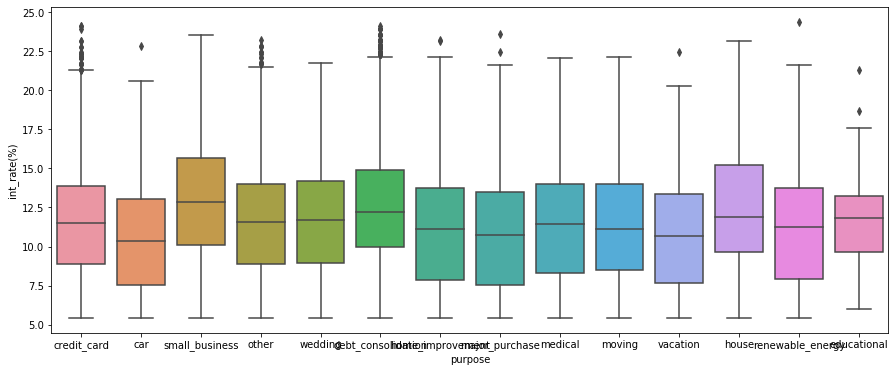

In [95]:
plt.figure(figsize=(15,6))
sns.boxplot(df1['purpose'],df1['int_rate(%)'])

In [96]:
cols=[cc,car,sm_bus,wedding,debt_cons,home_imp,maj_pur,med,move,vac,ren_energy,house,edu]
for i in cols:
    print(st.shapiro(i)[1])

5.587763101855281e-25
1.93624018283121e-18
1.2780983736637719e-11
2.0759673091674813e-08
3.689632533240255e-37
1.340263476145645e-23
6.103368860951931e-23
1.2539792315635623e-08
2.978234192596574e-08
2.966391150494019e-07
0.007449708878993988
0.00011813592573162168
0.000541682995390147


In [97]:
st.levene(cc,car,sm_bus,wedding,debt_cons,home_imp,maj_pur,med,move,vac,ren_energy,house,edu)

LeveneResult(statistic=10.95745769521117, pvalue=3.470803951943985e-22)

In [98]:
st.f_oneway(cc,car,sm_bus,wedding,debt_cons,home_imp,maj_pur,med,move,vac,ren_energy,house,edu)

F_onewayResult(statistic=80.70333026239605, pvalue=1.1414086282789235e-196)

From Shapiro test, all the variables have pvalue < 0.05. So null hypothesis is rejected means that no variable is following normal distribution
From levene test, the pvalue < 0.05. So null hypothesis is rejected means that variance is different
From the oneway anova test the pvalue is less than 0.05. So we are rejecting the null hypothesis(H0). So it is clear that the interest rate is different for different purpose

Hypothesis : 2
H0: Loan amount given for different grade is same
H1: Loan amount given for different grade is not same

In [99]:
A=df1[df1['grade']=='A']['loan_amnt']
B=df1[df1['grade']=='B']['loan_amnt']
C=df1[df1['grade']=='C']['loan_amnt']
D=df1[df1['grade']=='D']['loan_amnt']
E=df1[df1['grade']=='E']['loan_amnt']
F=df1[df1['grade']=='F']['loan_amnt']
G=df1[df1['grade']=='G']['loan_amnt']

In [100]:
cols=[A,B,C,D,E,F,G]
for i in cols:
    print(st.shapiro(i)[1])

0.0
0.0
0.0
2.2574918260272803e-42
4.624095781529544e-27
5.049606999901757e-12
1.7010974033837556e-06


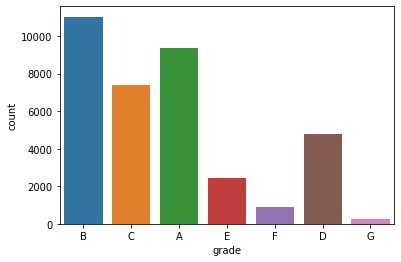

In [101]:
sns.countplot(df1['grade'])

In [102]:
st.levene(A,B,C,D,E,F,G)

LeveneResult(statistic=276.98580398200517, pvalue=0.0)

In [103]:
st.f_oneway(A,B,C,D,E,F,G)

F_onewayResult(statistic=607.3119303763068, pvalue=0.0)

From Shapiro test, all the variables have pvalue < 0.05. So null hypothesis is rejected means that no variable is following normal distribution
From levene test, the pvalue < 0.05. So null hypothesis is rejected means that variance is different
From the oneway anova test the pvalue is less than 0.05. So we are rejecting the null hypothesis(H0).It is clear that the loan amount for different grade is not same

Hypothesis : 3
H0: Loan status is having association with the grade
H1: Loan status is not having association with the grade

In [104]:
table=pd.crosstab(df1['loan_status'],df1['grade'])
st.chi2_contingency(table)

(1512.1854307455142,
 0.0,
 6,
 array([[1352.3432708 , 1594.91216534, 1072.62288288,  692.14533197,
          355.61351643,  126.48854751,   37.87428508],
        [8002.6567292 , 9438.08783466, 6347.37711712, 4095.85466803,
         2104.38648357,  748.51145249,  224.12571492]]))

From the chi2 test the pvalue is less than 0.05. So we are rejecting the null hypothesis(H0). It is clear that the Loan status is not having association with the grade

In [105]:
df1=df1.reset_index(drop=True)

In [106]:
df_num=df1.select_dtypes(include=np.number)
df_num.shape

(36193, 16)

In [107]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36193 non-null  int64  
 1   funded_amnt_inv         36193 non-null  float64
 2   installment             36193 non-null  float64
 3   annual_inc              36193 non-null  float64
 4   dti                     36193 non-null  float64
 5   inq_last_6mths          36193 non-null  int64  
 6   open_acc                36193 non-null  int64  
 7   pub_rec                 36193 non-null  int64  
 8   total_acc               36193 non-null  int64  
 9   int_rate(%)             36193 non-null  float64
 10  revol_util(%)           36193 non-null  float64
 11  emp_length(years)       36193 non-null  int64  
 12  earliest_cr_line_month  36193 non-null  int64  
 13  earliest_cr_line_year   36193 non-null  int64  
 14  issue_date_month        36193 non-null

In [108]:
df_cat=df1.select_dtypes(include=object)
print(df_cat.shape)
df_cat.columns

(36193, 8)


Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'term_months'],
      dtype='object')

In [109]:
#Removing subgrade column as it will be equivalent to the Grade column
df_cat.drop(columns='sub_grade',inplace=True)
df_cat.shape

(36193, 7)

In [110]:
#Performing encoding for the columns
df_dummies=pd.get_dummies(df_cat[['home_ownership','grade','verification_status','term_months']],drop_first=True)
df_dummies.shape

(36193, 12)

In [111]:
#Performing label encoding for Addr_state
state=df_cat['addr_state'].unique()
add_dict={}
j=1
for i in state:
    add_dict[i]=j
    j=j+1
df_cat['addr_state']=df_cat['addr_state'].map(add_dict)


In [112]:
#Performing label encoding for purpose
purpose=df_cat['purpose'].unique()
purpose_dict={}
j=1
for i in purpose:
    purpose_dict[i]=j
    j=j+1
df_cat['purpose']=df_cat['purpose'].map(purpose_dict)    

In [113]:
#Dropping columns home_ownership,verification_status,term_months,grade
df_cat.drop(columns=['home_ownership','grade','verification_status','term_months','loan_status'],inplace=True)

#concatenating the df_dummies, df_cat
df_cat=pd.concat([df_cat,df_dummies],axis=1)
df_cat.shape

(36193, 14)

In [114]:
df_cat.head()

purpose  addr_state  home_ownership_OTHER  home_ownership_OWN  \
0        1           1                     0                   0   
1        2           2                     0                   0   
2        3           3                     0                   0   
3        4           4                     0                   0   
4        5           1                     0                   0   

   home_ownership_RENT  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0                    1        1        0        0        0        0        0   
1                    1        0        1        0        0        0        0   
2                    1        0        1        0        0        0        0   
3                    1        0        1        0        0        0        0   
4                    1        0        0        0        0        0        0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   term_months_ 60   
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

# Feature selection 

In [115]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

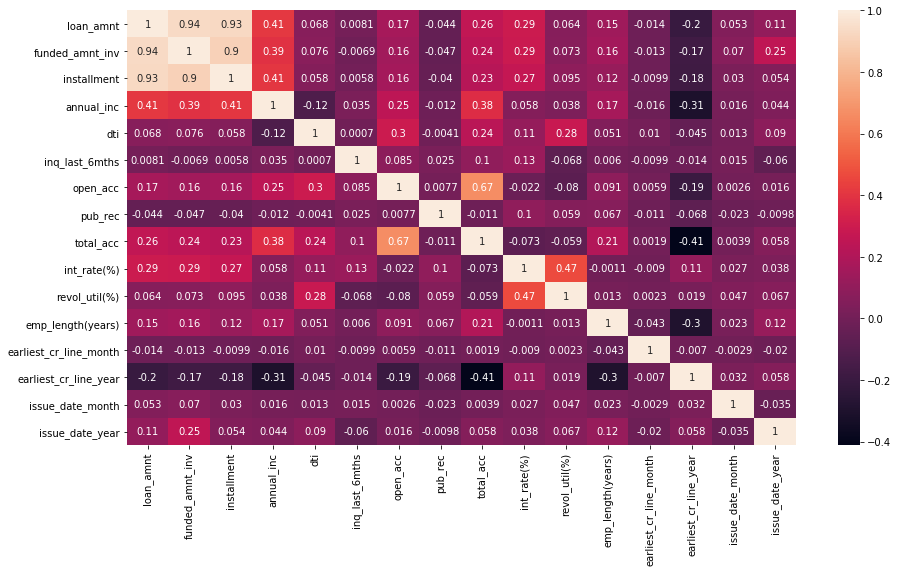

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True)

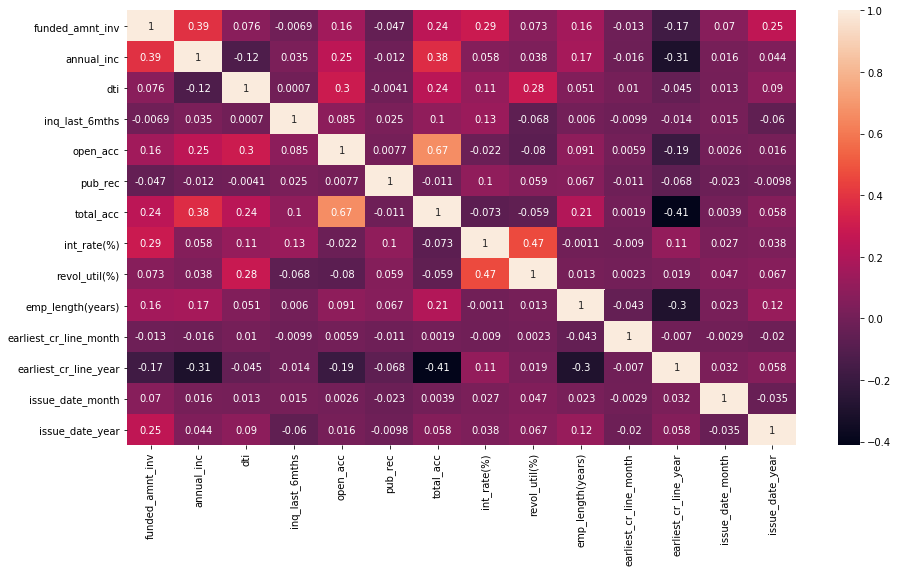

In [117]:
#The features of loan_amnt, funded_amnt_inv, installment have high correlation. So dropping two columns among them
plt.figure(figsize=(15,8))
sns.heatmap(df_num.drop(columns=['loan_amnt','installment']).corr(),annot=True)

using feature selection technique from sklearn to check importance of features for numerical columns

In [118]:
#Extacting y variable and encoding it. Checking the feature importances of numerical variables
# Goal is to find loan defaulters so changed off=1 , fully paid=0
y=df1['loan_status']
y=y.replace({'Charged Off':1,'Fully Paid':0})

In [119]:
feature_importances_=mutual_info_regression(df_num,y)

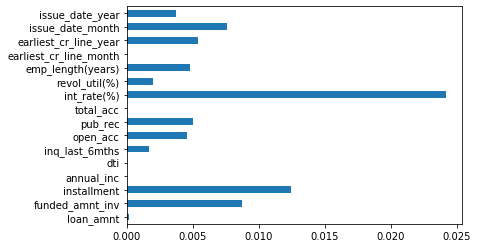

In [120]:
features_importances=pd.Series(feature_importances_,df_num.columns[0:len(df_num.columns)])
features_importances.plot(kind='barh')
plt.show()

From above graph we see that installment has high importance than funded_amnt_inv, loan_amnt. So keeping installment and removing other two columns in order to reduce multicollinearity

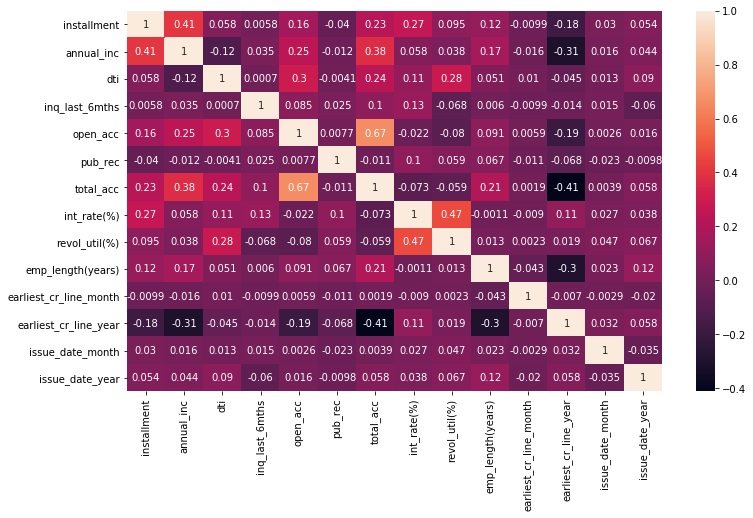

In [121]:
plt.figure(figsize=(12,7))
sns.heatmap(df_num.drop(columns=['funded_amnt_inv','loan_amnt']).corr(),annot=True)

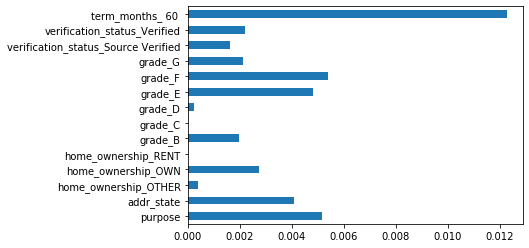

In [122]:
#Calculating the feature importance for categorical columns
feature_importances_cat=mutual_info_classif(df_cat,y)
features_importances_cat=pd.Series(feature_importances_cat,df_cat.columns[0:len(df_cat.columns)])
features_importances_cat.plot(kind='barh')
plt.show()

In [123]:
#Concating the df_num,df_cat to a single dataframe
df2=pd.concat([df_num,df_cat],axis=1)
print(df2.shape)
df2.head()

(36193, 30)


loan_amnt  funded_amnt_inv  installment  annual_inc    dti  inq_last_6mths  \
0       5000           4975.0       162.87     24000.0  27.65               1   
1       2500           2500.0        59.83     30000.0   1.00               5   
2       2400           2400.0        84.33     12252.0   8.72               2   
3      10000          10000.0       339.31     49200.0  20.00               1   
4       5000           5000.0       156.46     36000.0  11.20               3   

   open_acc  pub_rec  total_acc  int_rate(%)  revol_util(%)  \
0         3        0          9        10.65           83.7   
1         3        0          4        15.27            9.4   
2         2        0         10        15.96           98.5   
3        10        0         37        13.49           21.0   
4         9        0         12         7.90           28.3   

   emp_length(years)  earliest_cr_line_month  earliest_cr_line_year  \
0                 10                       1                   1985   
1                  0                       4                   1999   
2                 10                      11                   2021   
3                 10                       2                   1996   
4                  3                      11                   2021   

   issue_date_month  issue_date_year  purpose  addr_state  \
0                12             2011        1           1   
1                12             2011        2           2   
2                12             2011        3           3   
3                12             2011        4           4   
4                12             2011        5           1   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  grade_B  \
0                     0                   0                    1        1   
1                     0                   0                    1        0   
2                     0                   0                    1        0   
3                     0                   0                    1        0   
4                     0                   0                    1        0   

   grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        0        0        0        0   
1        1        0        0        0        0   
2        1        0        0        0        0   
3        1        0        0        0        0   
4        0        0        0        0        0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   term_months_ 60   
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

In [124]:
#Using Sequential Feature selection technique and applying forward substitution
lr=LogisticRegression()
sfs_forward=SequentialFeatureSelector(lr,k_features=25)
sfs_forward.fit(df2,y)
sfs_forward.k_feature_names_

('loan_amnt',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'int_rate(%)',
 'revol_util(%)',
 'emp_length(years)',
 'earliest_cr_line_year',
 'issue_date_month',
 'issue_date_year',
 'addr_state',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'verification_status_Verified',
 'term_months_ 60 ')

In [125]:
#Using Sequential Feature selection technique and applying backward elimination
sfs_backward=SequentialFeatureSelector(lr,k_features=25,forward=False)
sfs_backward.fit(df2,y)
sfs_backward.k_feature_names_

('funded_amnt_inv',
 'installment',
 'annual_inc',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'int_rate(%)',
 'emp_length(years)',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'issue_date_month',
 'purpose',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'term_months_ 60 ')

In [126]:
#The final set of features obtained are stored in features variable. The final set is obtained from the combination of columns 
#that are common in sfs_backward,sfs_forward,mutual_info algorithm
features=['loan_amnt', 'funded_amnt_inv', 'dti', 'inq_last_6mths', 'pub_rec', 'int_rate(%)', 'revol_util(%)',
 'purpose', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'grade_C', 'grade_D', 'grade_E', 'verification_status_Verified',
 'term_months_ 60 ', 'grade_B', 'grade_G', 'earliest_cr_line_month', 'earliest_cr_line_year', 'open_acc',
 'addr_state', 'grade_F','issue_date_year', 'issue_date_month']
print('The number of features are:',len(features))

The number of features are: 25


# Scaling the features

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=df2[features]
x_num=x.loc[:,['loan_amnt','funded_amnt_inv','dti','int_rate(%)','revol_util(%)',]]
x_num=pd.DataFrame(sc.fit_transform(x_num),columns=x_num.columns)
x_num.head()

loan_amnt  funded_amnt_inv       dti  int_rate(%)  revol_util(%)
0  -0.826818        -0.750763  2.161242    -0.349989       1.222316
1  -1.172104        -1.108352 -1.849416     0.913748      -1.398081
2  -1.185916        -1.122800 -0.687605     1.102488       1.744279
3  -0.136246        -0.024747  1.009965     0.426854      -0.988975
4  -0.826818        -0.747151 -0.314380    -1.102214      -0.731520

In [128]:
#The final transformed independent variables 
x_sc=pd.concat([x_num,x.drop(columns=x_num.columns)],axis=1)
print(x_sc.shape)
x_sc.head()

(36193, 25)


loan_amnt  funded_amnt_inv       dti  int_rate(%)  revol_util(%)  \
0  -0.826818        -0.750763  2.161242    -0.349989       1.222316   
1  -1.172104        -1.108352 -1.849416     0.913748      -1.398081   
2  -1.185916        -1.122800 -0.687605     1.102488       1.744279   
3  -0.136246        -0.024747  1.009965     0.426854      -0.988975   
4  -0.826818        -0.747151 -0.314380    -1.102214      -0.731520   

   inq_last_6mths  pub_rec  purpose  home_ownership_OTHER  home_ownership_OWN  \
0               1        0        1                     0                   0   
1               5        0        2                     0                   0   
2               2        0        3                     0                   0   
3               1        0        4                     0                   0   
4               3        0        5                     0                   0   

   home_ownership_RENT  grade_C  grade_D  grade_E  \
0                    1        0        0        0   
1                    1        1        0        0   
2                    1        1        0        0   
3                    1        1        0        0   
4                    1        0        0        0   

   verification_status_Verified  term_months_ 60   grade_B  grade_G  \
0                             1                 0        1        0   
1                             0                 1        0        0   
2                             0                 0        0        0   
3                             0                 0        0        0   
4                             0                 0        0        0   

   earliest_cr_line_month  earliest_cr_line_year  open_acc  addr_state  \
0                       1                   1985         3           1   
1                       4                   1999         3           2   
2                      11                   2021         2           3   
3                       2                   1996        10           4   
4                      11                   2021         9           1   

   grade_F  issue_date_year  issue_date_month  
0        0             2011                12  
1        0             2011                12  
2        0             2011                12  
3        0             2011                12  
4        0             2011                12

# Balancing the dataset

The project on loan default model is very much analagous to the defect or disease capturing models where there will be always more data on OK and only fewer example data on NOT OK or default issues. Such data is the natural data on a practical real life situation and hence does not need tp be balanced.

## Train test split

In [129]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x_sc , y , test_size=0.3 , random_state=10)

# Building the models

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, auc, roc_auc_score,roc_curve,classification_report, confusion_matrix,f1_score 
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Decision Tree BASE MODEL

In [131]:
# cross validation for random forest model to find out bias & variance error
dt=DecisionTreeClassifier(random_state=10)
score=cross_val_score(dt , xtrain ,ytrain , scoring='accuracy')
bias=np.mean(1-score)
var=np.std(score)
print('Bias error     :',bias)
print('variance error :', var)

Bias error     : 0.2479573712255773
variance error : 0.002836980118581653


In [132]:
# building the model
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)
ypred_dt=dt.predict(xtest)
print ('Training accuracy:',dt.score(xtrain,ytrain))
print ('Testing accuracy :',dt.score(xtest,ytest))

Training accuracy: 1.0
Testing accuracy : 0.7569533984159146


AUC-ROC Score :  0.5365844465418559


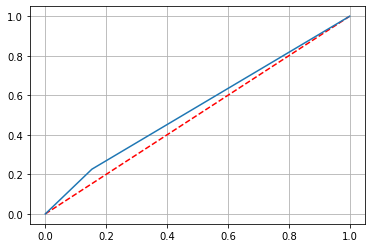

In [133]:
ypred_full=dt.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_full))
fpr,tpr,thresholds = roc_curve(ytest,ypred_full)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

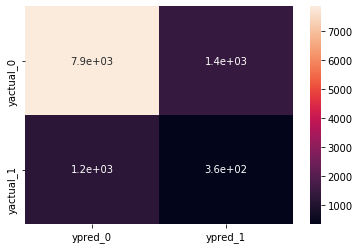

In [134]:
#Confusion matrix
cm=pd.DataFrame(data=confusion_matrix(ytest,ypred_dt),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

In [135]:
# classification report for decison tree base model
# list to save results of precision,recall,f1-score & accuracy 
report_list=[]
print('Confusion matrix:')
print(confusion_matrix(ytest,ypred_dt))
print('Classification Report :')
cr1=classification_report(ytest,ypred_dt,output_dict=True)
report_list.append(['Decision Tree Base',cr1['0']['precision'],cr1['0']['recall'],cr1['0']['f1-score'],cr1['1']['precision'],cr1['1']['recall'],cr1['1']['f1-score'],cr1['accuracy']])
print(classification_report(ytest,ypred_dt))

Confusion matrix:
[[7863 1422]
 [1217  356]]
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9285
           1       0.20      0.23      0.21      1573

    accuracy                           0.76     10858
   macro avg       0.53      0.54      0.53     10858
weighted avg       0.77      0.76      0.76     10858



## Decision Tree Hypertunned model

In [136]:
# tunned model to find best parameters
DT1=DecisionTreeClassifier()
param=({'max_depth': np.arange(3,100) ,'criterion':['gini','entropy']})

gs=GridSearchCV(DT1 , param_grid=param , scoring='roc_auc',n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [137]:
# tunned model to find best parameters
DT2=DecisionTreeClassifier()
param=({'max_depth': np.arange(3,100) ,'criterion':['gini','entropy']})

gs=GridSearchCV(DT2 , param_grid=param , scoring='f1_weighted',n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [138]:
# cross validation for random forest model to find out bias & variance error

DT1=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=10)
score1=cross_val_score(DT1 , xtrain ,ytrain , scoring='roc_auc')

biasdt1=np.mean(1-score1)
vardt1=np.std(score1)

print('Bias error     :',biasdt1)
print('variance error :', vardt1)

Bias error     : 0.3178616195764858
variance error : 0.005383083569582452


In [139]:
DT2=DecisionTreeClassifier(max_depth=7,criterion='gini',random_state=10)
score2=cross_val_score(DT2 , xtrain ,ytrain , scoring='f1_weighted')

biasdt2=np.mean(1-score2)
vardt2=np.std(score2)

print('Bias error     :',biasdt2)
print('variance error :', vardt2)

Bias error     : 0.20458389905255459
variance error : 0.0024793332898697955


In [140]:
DT1=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=10)
DT1.fit(xtrain,ytrain)
#ypred_DT1=DT1.predict(xtest)
print ('Training accuracy:',DT1.score(xtrain,ytrain))
print ('Testing accuracy :',DT1.score(xtest,ytest))


Training accuracy: 0.8556937043615551
Testing accuracy : 0.8548535641923006


In [141]:
DT2=DecisionTreeClassifier(max_depth=7,criterion='gini',random_state=10)
DT2.fit(xtrain,ytrain)
#ypred_DT1=DT1.predict(xtest)
print ('Training accuracy:',DT2.score(xtrain,ytrain))
print ('Testing accuracy :',DT2.score(xtest,ytest))

Training accuracy: 0.861022301164397
Testing accuracy : 0.8485909007183643


AUC-ROC Score :  0.6763722154381575


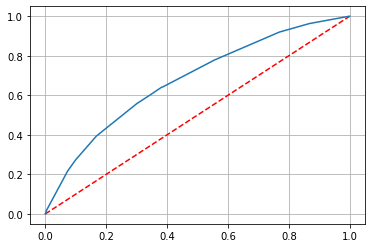

In [142]:
ypred_tunned=DT1.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_tunned))

fpr,tpr,thresholds = roc_curve(ytest,ypred_tunned)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)

plt.grid(True)

plt.show()

AUC-ROC Score :  0.6623497420971352


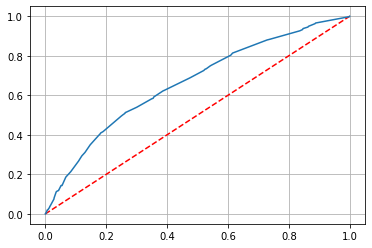

In [143]:
ypred_tunned=DT2.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_tunned))

fpr,tpr,thresholds = roc_curve(ytest,ypred_tunned)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)

plt.grid(True)

plt.show()

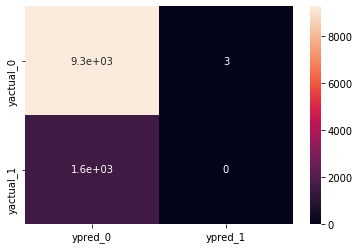

In [144]:
ypred_DT1=DT1.predict(xtest)

cm=pd.DataFrame(data=confusion_matrix(ytest,ypred_DT1),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

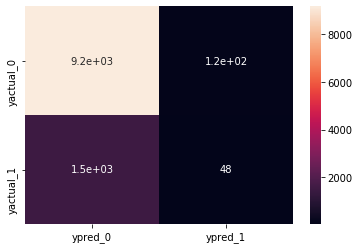

In [145]:
ypred_DT2=DT2.predict(xtest)

cm=pd.DataFrame(data=confusion_matrix(ytest,ypred_DT2),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

In [146]:
# ROC-AUC SCORE TUNNED
ypred_DT1=DT1.predict(xtest)
print('Classification Report :')
cr2=classification_report(ytest,ypred_DT1,output_dict=True)
report_list.append(['Decision Tree Tunned using ROC-AUC',cr2['0']['precision'],cr2['0']['recall'],cr2['0']['f1-score'],cr2['1']['precision'],cr2['1']['recall'],cr2['1']['f1-score'],cr2['accuracy']])
print(classification_report(ytest,ypred_DT1))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9285
           1       0.00      0.00      0.00      1573

    accuracy                           0.85     10858
   macro avg       0.43      0.50      0.46     10858
weighted avg       0.73      0.85      0.79     10858



In [147]:
# F1-SCORE TUNNED
ypred_DT2=DT2.predict(xtest)
print('Classification Report :')
cr3=classification_report(ytest,ypred_DT2,output_dict=True)
report_list.append(['Decision Tree Tunned using F1-Weighted',cr3['0']['precision'],cr3['0']['recall'],cr3['0']['f1-score'],cr3['1']['precision'],cr3['1']['recall'],cr3['1']['f1-score'],cr3['accuracy']])
print(classification_report(ytest,ypred_DT2))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9285
           1       0.29      0.03      0.06      1573

    accuracy                           0.85     10858
   macro avg       0.57      0.51      0.49     10858
weighted avg       0.77      0.85      0.79     10858



# XGBoosting

In [148]:
tunned_param=[{'n_estimators':np.arange(3,100)}]
xgb_model=XGBClassifier(random_state=10)
xgb_grid=GridSearchCV(estimator=xgb_model , param_grid=tunned_param,cv=5,n_jobs=-1)

xgb_grid.fit(xtrain,ytrain)
xgb_grid.best_params_

[00:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 6}

In [149]:
# max depth=4 taken from the above decision tree model
xgb1=XGBClassifier(n_estimators=6,random_state=10)
xgbscore1=cross_val_score(xgb1, xtrain ,ytrain , scoring='roc_auc')

biasxgb2=np.mean(1-xgbscore1)
varxgb2=np.std(xgbscore1)

print('Bias error     :',biasxgb2)
print('variance error :', varxgb2)

[00:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [150]:
xgb1=XGBClassifier(n_estimators=6,max_depth=4,random_state=10)
xgb1.fit(xtrain,ytrain)
print ('Training accuracy:',xgb1.score(xtrain,ytrain))
print ('Testing accuracy :',xgb1.score(xtest,ytest))

[00:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.8559700019735543
Testing accuracy : 0.855498250138147


In [151]:
# ROC-AUC SCORE TUNNED
ypredxgb1=xgb1.predict(xtest)
print('Classification Report :')
cr4=classification_report(ytest,ypredxgb1,output_dict=True)
report_list.append(['Extreme Gradient Boosting',cr4['0']['precision'],cr4['0']['recall'],cr4['0']['f1-score'],cr4['1']['precision'],cr4['1']['recall'],cr4['1']['f1-score'],cr4['accuracy']])
print(classification_report(ytest,ypredxgb1))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9285
           1       0.61      0.01      0.01      1573

    accuracy                           0.86     10858
   macro avg       0.73      0.50      0.47     10858
weighted avg       0.82      0.86      0.79     10858



AUC-ROC Score :  0.6864221938535346


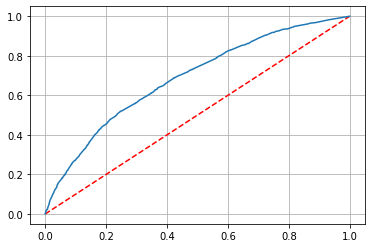

In [152]:
ypred_xgb1=xgb1.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_xgb1))

fpr,tpr,thresholds = roc_curve(ytest,ypred_xgb1)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)

plt.grid(True)

plt.show()

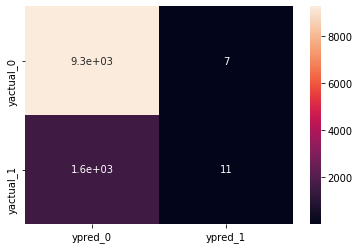

In [153]:
ypred_xg1=xgb1.predict(xtest)

cm=pd.DataFrame(data=confusion_matrix(ytest,ypred_xg1),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

## Random Forest BASE MODEL

In [154]:
# cross validation for random forest model to find out bias & variance error
rf=RandomForestClassifier(random_state=10)
score=cross_val_score(rf , xtrain ,ytrain , scoring='f1_weighted')
bias=np.mean(1-score)
var=np.std(score)
print('Bias error     :',bias)
print('variance error :', var)

Bias error     : 0.2076668899558875
variance error : 0.001041963640326196


In [155]:
rf=RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print ('Training accuracy:',rf.score(xtrain,ytrain))
print ('Testing accuracy :',rf.score(xtest,ytest))

Training accuracy: 0.9999605289125716
Testing accuracy : 0.8552219561613557


AUC-ROC Score :  0.6739033864749828


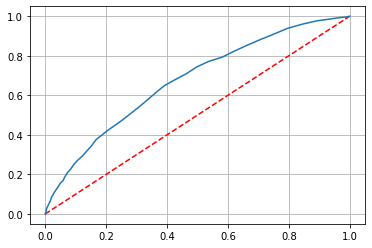

In [156]:
ypred_rffull=rf.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_rffull))
fpr,tpr,thresholds = roc_curve(ytest,ypred_rffull)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

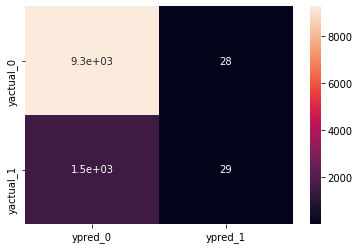

In [157]:
ypred=rf.predict(xtest)
cm=pd.DataFrame(data=confusion_matrix(ytest,ypred),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

In [158]:
ypred_rf=rf.predict(xtest)
print('Classification Report :')
print(classification_report(ytest,ypred_rf))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9285
           1       0.51      0.02      0.04      1573

    accuracy                           0.86     10858
   macro avg       0.68      0.51      0.48     10858
weighted avg       0.81      0.86      0.79     10858



In [159]:
ypred_rf=rf.predict(xtest)
print('Classification Report :')
cr5=classification_report(ytest,ypred_rf,output_dict=True)
report_list.append(['Random Forest Base',cr5['0']['precision'],cr5['0']['recall'],cr5['0']['f1-score'],cr5['1']['precision'],cr5['1']['recall'],cr5['1']['f1-score'],cr5['accuracy']])
print(classification_report(ytest,ypred_rf))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9285
           1       0.51      0.02      0.04      1573

    accuracy                           0.86     10858
   macro avg       0.68      0.51      0.48     10858
weighted avg       0.81      0.86      0.79     10858



## Random Forest Hypertunned Model

In [160]:
# tunned model to find best parameters
rf_tunned=RandomForestClassifier()
param=({'n_estimators': np.arange(1,100) , 'criterion':['entropy','gini']})
gs=GridSearchCV(rf_tunned , param_grid=param , scoring='f1_weighted' ,n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'gini', 'n_estimators': 9}

In [161]:
# cross validation for random model to find out bias & variance error
RF_tunned=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=10)
score=cross_val_score(RF_tunned , xtrain ,ytrain , scoring='f1_weighted')
bias=np.mean(1-score)
var=np.std(score)
print('Bias error     :',bias)
print('variance error :', var)

Bias error     : 0.20317452544530684
variance error : 0.0027480135048016845


In [162]:
# random forest model
RF_tunned=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=10)
RF_tunned.fit(xtrain,ytrain)
ypredrf1=RF_tunned.predict(xtrain)
ypredrf2=RF_tunned.predict(xtest)
print('\nOverall accuaracy of the Decision tree training data :',accuracy_score(ytrain,ypredrf1))
print('Overall accuaracy of the Decision tree testing data  :',accuracy_score(ytest,ypredrf2))
from sklearn.metrics import cohen_kappa_score
print('\nCohen kappa score:',cohen_kappa_score( ytest , ypredrf2))


Overall accuaracy of the Decision tree training data : 0.9992895204262877
Overall accuaracy of the Decision tree testing data  : 0.855498250138147

Cohen kappa score: 0.027142382842457957


In [163]:
ypred_RF=RF_tunned.predict(xtest)
print('Classification Report :')
cr6=classification_report(ytest,ypred_RF,output_dict=True)
report_list.append(['Random Forest Tunned',cr6['0']['precision'],cr6['0']['recall'],cr6['0']['f1-score'],cr6['1']['precision'],cr6['1']['recall'],cr6['1']['f1-score'],cr6['accuracy']])
print(classification_report(ytest,ypred_RF))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9285
           1       0.54      0.02      0.04      1573

    accuracy                           0.86     10858
   macro avg       0.70      0.51      0.48     10858
weighted avg       0.81      0.86      0.79     10858



AUC-ROC Score :  0.6707710314847927


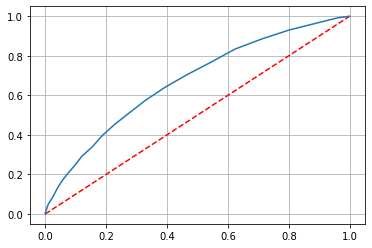

In [164]:
ypred_rft=RF_tunned.predict_proba(xtest)[:,1]
print('AUC-ROC Score : ',roc_auc_score(ytest,ypred_rft))
fpr,tpr,thresholds = roc_curve(ytest,ypred_rft)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

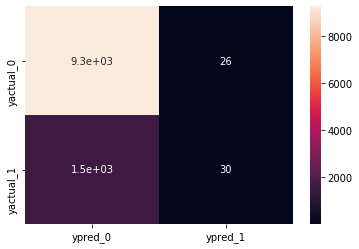

In [165]:
cm=pd.DataFrame(data=confusion_matrix(ytest,ypred_RF),columns=['ypred_0','ypred_1'],index=['yactual_0','yactual_1'])
sns.heatmap(cm ,annot=True)
plt.show()

### Dataframe of results

In [168]:
report1=pd.DataFrame(data=report_list,columns=['MODEL','Precision_0','Recall_0',
                                                        'f1-score_0','Precision_1','Recall_1','f1-score_1','Overall_accuracy'])
report1

MODEL  Precision_0  Recall_0  f1-score_0  \
0                      Decision Tree Base     0.865969  0.846850    0.856303   
1      Decision Tree Tunned using ROC-AUC     0.855090  0.999677    0.921748   
2  Decision Tree Tunned using F1-Weighted     0.857357  0.987184    0.917701   
3               Extreme Gradient Boosting     0.855904  0.999246    0.922037   
4                      Random Forest Base     0.857050  0.996984    0.921737   
5                    Random Forest Tunned     0.857156  0.997200    0.921890   

   Precision_1  Recall_1  f1-score_1  Overall_accuracy  
0     0.200225  0.226319    0.212474          0.756953  
1     0.000000  0.000000    0.000000          0.854854  
2     0.287425  0.030515    0.055172          0.848591  
3     0.611111  0.006993    0.013828          0.855498  
4     0.508772  0.018436    0.035583          0.855222  
5     0.535714  0.019072    0.036832          0.855498

# Logistic Regression

In [169]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred_logreg = logreg.predict(xtest)
accuracy_logreg = accuracy_score(ytest, ypred_logreg)
f1_logreg = f1_score(ytest, ypred_logreg)
precision_logreg = precision_score(ytest, ypred_logreg)
recall_logreg = recall_score(ytest, ypred_logreg)
auc_logreg = roc_auc_score(ytest, ypred_logreg)
conf_logreg = confusion_matrix(ytest, ypred_logreg)
print('Confusion matrix:\n',conf_logreg)
print('Auc:',auc_logreg)
print('Recall:',recall_logreg)
print('Precision:',precision_logreg)
print('f1_score:',f1_logreg)
print('Accuracy:',accuracy_logreg)



Confusion matrix:
 [[9282    3]
 [1569    4]]
Auc: 0.5011099049283805
Recall: 0.0025429116338207248
Precision: 0.5714285714285714
f1_score: 0.005063291139240506
Accuracy: 0.8552219561613557


In [193]:
# Dictionary of classification report
cr7=classification_report(ytest,ypred_logreg,output_dict=True)

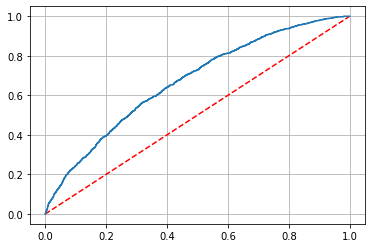

In [170]:
y_pred_prob_logreg = logreg.predict_proba(xtest)
y_pred_prob_logreg1 = logreg.predict_proba(xtrain)
fpr,tpr,th = roc_curve(ytest,y_pred_prob_logreg[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

In [171]:
y_pred_df_logreg= pd.Series(y_pred_prob_logreg[:,1])
y_pred_df_logreg

0        0.089246
1        0.079791
2        0.151662
3        0.192790
4        0.054651
           ...   
10853    0.241237
10854    0.151785
10855    0.206950
10856    0.205922
10857    0.244274
Length: 10858, dtype: float64

In [172]:
def cutoff_youdens_j(fpr,tpr,th):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,th))
    return j_ordered[-1][1]
cutoff = cutoff_youdens_j(fpr,tpr,th)
ser1 = []
for i in y_pred_prob_logreg1[:, 1]:
    if(i > cutoff):
        ser1.append(1)
    else:
        ser1.append(0)
df_ser1 = pd.DataFrame(ser1)

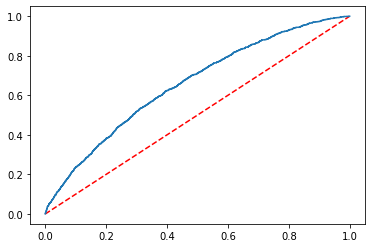

Confusion matrix:
 [[6316 2969]
 [ 726  847]]
Auc: 0.6093492398823578
Recall: 0.5384615384615384
Precision: 0.2219601677148847
f1_score: 0.3143440341436259
Accuracy: 0.6596979185853749


In [173]:
logreg1 = LogisticRegression()
logreg1.fit(xtrain, df_ser1)
y_pred_logreg1 = logreg1.predict(xtest)
y_pred_prob_logreg_tuned = logreg1.predict_proba(xtest)
accuracy_logreg1 = accuracy_score(ytest, y_pred_logreg1)
conf_logreg1 = confusion_matrix(ytest, y_pred_logreg1)
f1_logreg1 = f1_score(ytest, y_pred_logreg1)
recall_logreg1 = recall_score(ytest, y_pred_logreg1)
precision_logreg1 = precision_score(ytest, y_pred_logreg1)
auc_logreg1 = roc_auc_score(ytest, y_pred_logreg1)
fpr,tpr,thresholds = roc_curve(ytest,y_pred_prob_logreg_tuned[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.show()
print('Confusion matrix:\n',conf_logreg1)
print('Auc:',auc_logreg1)
print('Recall:',recall_logreg1)
print('Precision:',precision_logreg1)
print('f1_score:',f1_logreg1)
print('Accuracy:',accuracy_logreg1)

In [194]:
# Dictionary of classification report
cr8=classification_report(ytest,y_pred_logreg1,output_dict=True)

# Navie Bayes

In [174]:
nbmodel = GaussianNB()
nbmodel.fit(xtrain, ytrain)
ypred_nb = nbmodel.predict(xtest)
accuracy_nb = accuracy_score(ytest, ypred_nb)
f1_nb = f1_score(ytest, ypred_nb)
precision_nb = precision_score(ytest, ypred_nb)
recall_nb = recall_score(ytest, ypred_nb)
auc_nb = roc_auc_score(ytest, ypred_nb)
conf_nb = confusion_matrix(ytest, ypred_nb)
print('Confusion matrix\n',conf_nb)
print('AUC score:',auc_nb)
print('Recall:',recall_nb)
print('Precision:',precision_nb)
print('F1_score:',f1_nb)
print('Accuracy:',accuracy_nb)

Confusion matrix
 [[8212 1073]
 [1128  445]]
AUC score: 0.583668091833755
Recall: 0.2828989192625556
Precision: 0.29314888010540185
F1_score: 0.28793270786153347
Accuracy: 0.7972923190274452


In [195]:
# Dictionary of classification report
cr9=classification_report(ytest,ypred_nb,output_dict=True)

In [175]:
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=10)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator = nbmodel, param_grid = params_NB, cv = cv_method,verbose = 1, scoring = 'f1_weighted')
gs_NB.fit(xtrain, ytrain)
print('Best parameters:',gs_NB.best_params_)
print('Best score:',gs_NB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'var_smoothing': 0.0006579332246575676}
Best score: 0.8041995173728701


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   56.7s finished


In [176]:
nbmodel1 = GaussianNB(var_smoothing=0.0012328467394420659)
nbmodel1.fit(xtrain, ytrain)
ypred_nb1 = nbmodel1.predict(xtest)
accuracy_nb1 = accuracy_score(ytest, ypred_nb1)
f1_nb1 = f1_score(ytest, ypred_nb1)
precision_nb1 = precision_score(ytest, ypred_nb1)
recall_nb1 = recall_score(ytest, ypred_nb1)
auc_nb1 = roc_auc_score(ytest, ypred_nb1)
conf_nb1=confusion_matrix(ytest,ypred_nb1)
print('Confusion matrix\n',conf_nb1)
print('AUC score:',auc_nb1)
print('Recall:',recall_nb1)
print('Precision:',precision_nb1)
print('F1_score:',f1_nb1)
print('Accuracy:',accuracy_nb1)

Confusion matrix
 [[8960  325]
 [1403  170]]
AUC score: 0.536535525961286
Recall: 0.1080737444373808
Precision: 0.3434343434343434
F1_score: 0.16441005802707928
Accuracy: 0.8408546693682077


In [196]:
# Dictionary of classification report
cr10=classification_report(ytest,ypred_nb1,output_dict=True)

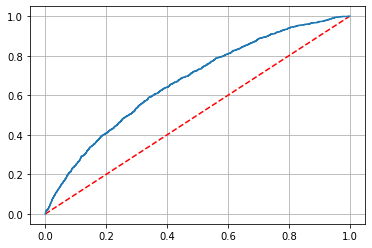

In [177]:
ypred_nb_tuned = nbmodel1.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest,ypred_nb_tuned)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

In [178]:
model = XGBClassifier(objective='binary:logistic')
model.fit(xtrain, ytrain)
ypred_xgboost = model.predict(xtest)
ypred_xgboost_prob = model.predict_proba(xtest)[:,1]
accuracy_xgboost = accuracy_score(ytest, ypred_xgboost)
f1_xgboost = f1_score(ytest, ypred_xgboost)
precision_xgboost = precision_score(ytest, ypred_xgboost)
recall_xgboost = recall_score(ytest, ypred_xgboost)
auc_xgboost = roc_auc_score(ytest, ypred_xgboost)
conf_xgboost = confusion_matrix(ytest, ypred_xgboost)
print('Confusion matrix\n',conf_xgboost)
print('AUC:',auc_xgboost)
print('Recall:',recall_xgboost)
print('Precision:',precision_xgboost)
print('F1_score:',f1_xgboost)
print('Accuracy:',accuracy_xgboost)

[00:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix
 [[9125  160]
 [1482   91]]
AUC: 0.52030957244645
Recall: 0.05785123966942149
Precision: 0.36254980079681276
F1_score: 0.09978070175438597
Accuracy: 0.8487750967028919


In [197]:
# Dictionary of classification report
cr11=classification_report(ytest,ypred_xgboost,output_dict=True)

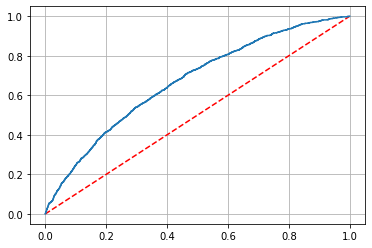

In [179]:
fpr,tpr,thresholds = roc_curve(ytest, ypred_xgboost_prob)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

In [180]:
param_grid = {'criterion': ['entropy', 'gini'], 'max_depth': range(2, 5), 'n_estimators': [90, 100, 150, 200]}
gs_xgboost = GridSearchCV(estimator = model,param_grid = param_grid,verbose = 1,cv = 5,scoring = 'f1_weighted')
gs_xgboost.fit(xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[00:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[00:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used bu

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.9min finished


[00:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
             

In [181]:
print('Best Parameters',gs_xgboost.best_params_)

Best Parameters {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}


In [182]:
model1 = XGBClassifier(objective='binary:logistic', criterion = 'entropy', max_depth = 4, n_estimators = 90)
model1.fit(xtrain, ytrain)
ypred_xgboost1 = model1.predict(xtest)
accuracy_xgboost1 = accuracy_score(ytest, ypred_xgboost1)
f1_xgboost1 = f1_score(ytest, ypred_xgboost1)
precision_xgboost1 = precision_score(ytest, ypred_xgboost1)
recall_xgboost1 = recall_score(ytest, ypred_xgboost1)
auc_xgboost1 = roc_auc_score(ytest, ypred_xgboost1)
conf_xgboost1 = confusion_matrix(ytest, ypred_xgboost1)
print('Confusion matrix\n',conf_xgboost1)
print('AUC:',auc_xgboost1)
print('Recall:',recall_xgboost1)
print('Precision:',precision_xgboost1)
print('F1_score:',f1_xgboost1)
print('Accuracy:',accuracy_xgboost1)

[00:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix
 [[9205   80]
 [1513   60]]
AUC: 0.5147638135595252
Recall: 0.03814367450731087
Precision: 0.42857142857142855
F1_score: 0.0700525394045534
Accuracy: 0.8532878983238166


In [198]:
# Dictionary of classification report
cr12=classification_report(ytest,ypred_xgboost1,output_dict=True)

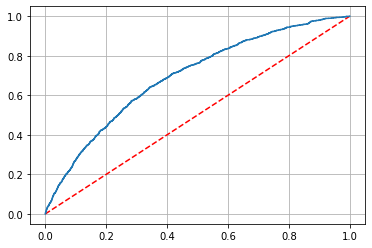

In [183]:
ypred_xgboost1_prob = model1.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest, ypred_xgboost1_prob)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

In [184]:
data = {'Accuracy':[accuracy_logreg, accuracy_logreg1, accuracy_nb, accuracy_nb1, accuracy_xgboost, accuracy_xgboost1], 
        'F1_Score':[f1_logreg, f1_logreg1, f1_nb, f1_nb1, f1_xgboost, f1_xgboost1],
        'Precision':[precision_logreg, precision_logreg1, precision_nb, precision_nb1, precision_xgboost, precision_xgboost1],
        'Recall': [recall_logreg, recall_logreg1, recall_nb, recall_nb1, recall_xgboost, recall_xgboost1],
        'AUC_Score':[auc_logreg, auc_logreg1, auc_nb, auc_nb1, auc_xgboost, auc_xgboost1]} 
Report_2= pd.DataFrame(data, index =['Logistic Regression', 'Logistic Regression Tuned', 'Naive Bayes', 'Naive Bayes Tuned', 
                                        'XGB Classifier', 'XGB Classifier Tuned']) 
Report_2

Accuracy  F1_Score  Precision    Recall  AUC_Score
Logistic Regression        0.855222  0.005063   0.571429  0.002543   0.501110
Logistic Regression Tuned  0.659698  0.314344   0.221960  0.538462   0.609349
Naive Bayes                0.797292  0.287933   0.293149  0.282899   0.583668
Naive Bayes Tuned          0.840855  0.164410   0.343434  0.108074   0.536536
XGB Classifier             0.848775  0.099781   0.362550  0.057851   0.520310
XGB Classifier Tuned       0.853288  0.070053   0.428571  0.038144   0.514764

# KNN

In [185]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
accuracy_knn = accuracy_score(ytest, ypred_knn)
f1_knn = f1_score(ytest, ypred_knn)
precision_knn = precision_score(ytest, ypred_knn)
recall_knn = recall_score(ytest, ypred_knn)
auc_knn = roc_auc_score(ytest, ypred_knn)
conf_knn = confusion_matrix(ytest, ypred_knn)
print('Confusion matrix\n',conf_knn)
print('AUC:',auc_knn)
print('Recall:',recall_knn)
print('Precision:',precision_knn)
print('F1_score:',f1_knn)
print('Accuracy:',accuracy_knn)

Confusion matrix
 [[9071  214]
 [1513   60]]
AUC: 0.5075478738718568
Recall: 0.03814367450731087
Precision: 0.21897810218978103
F1_score: 0.06497022198159176
Accuracy: 0.8409467673604716


In [201]:
# Dictionary of classification report
cr13=classification_report(ytest,ypred_knn,output_dict=True)

In [186]:
knn=KNeighborsClassifier()
param={ 'n_neighbors':range(10,100),'weights':['uniform','distance'], 'algorithm':['auto','ball_tree', 'kd_tree']}
gs=GridSearchCV(knn,param_grid=param,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 71.8min finished


{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [187]:
knn1=KNeighborsClassifier(n_neighbors=10, weights='distance',algorithm='auto')
knn1.fit(xtrain,ytrain)
ypred_knn1=knn1.predict(xtest)
accuracy_knn1 = accuracy_score(ytest, ypred_knn1)
f1_knn1 = f1_score(ytest, ypred_knn1)
precision_knn1 = precision_score(ytest, ypred_knn1)
recall_knn1 = recall_score(ytest, ypred_knn1)
auc_knn1 = roc_auc_score(ytest, ypred_knn1)
conf_knn1 = confusion_matrix(ytest, ypred_knn1)
print('Confusion matrix\n',conf_knn1)
print('AUC:',auc_knn1)
print('Recall:',recall_knn1)
print('Precision:',precision_knn1)
print('F1_score:',f1_knn1)
print('Accuracy:',accuracy_knn1)

Confusion matrix
 [[9237   48]
 [1556   17]]
AUC: 0.5028188730053909
Recall: 0.01080737444373808
Precision: 0.26153846153846155
F1_score: 0.020757020757020756
Accuracy: 0.8522748204089151


In [202]:
# Dictionary of classification report
cr14=classification_report(ytest,ypred_knn1,output_dict=True)

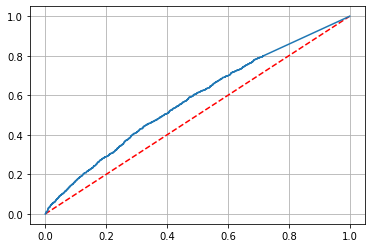

In [188]:
ypred_knn1_prob = knn1.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest, ypred_knn1_prob)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

# DATAFRAME OF  RESULT OF ALL THE MODELS 

In [204]:
new_zero=pd.DataFrame(data=[cr1['0'],cr2['0'],cr3['0'],cr4['0'],cr5['0'],cr6['0'],cr7['0'],cr8['0'],cr9['0'],cr10['0'],cr11['0'],cr12['0'],cr13['0'],cr14['0']])
new_one=pd.DataFrame(data=[cr1['1'],cr2['1'],cr3['1'],cr4['1'],cr5['1'],cr6['1'],cr7['1'],cr8['1'],cr9['1'],cr10['1'],cr11['1'],cr12['1'],cr13['1'],cr14['1']])
acc_df=pd.DataFrame(data=[cr1['accuracy'],cr2['accuracy'],cr3['accuracy'],cr4['accuracy'],cr5['accuracy'],cr6['accuracy'],cr7['accuracy'],cr8['accuracy'],cr9['accuracy'],cr10['accuracy'],cr11['accuracy'],cr12['accuracy'],cr13['accuracy'],cr14['accuracy']])
new_macro=pd.DataFrame(data=[cr1['macro avg'],cr2['macro avg'],cr3['macro avg'],cr4['macro avg'],cr5['macro avg'],cr6['macro avg'],cr7['macro avg'],cr8['macro avg'],cr9['macro avg'],cr10['macro avg'],cr11['macro avg'],cr12['macro avg'],cr13['macro avg'],cr14['macro avg']])
new_weighted=pd.DataFrame(data=[cr1['weighted avg'],cr2['weighted avg'],cr3['weighted avg'],cr4['weighted avg'],cr5['weighted avg'],cr6['weighted avg'],cr7['weighted avg'],cr8['weighted avg'],cr9['weighted avg'],cr10['weighted avg'],cr11['weighted avg'],cr12['weighted avg'],cr13['weighted avg'],cr14['weighted avg']])


In [205]:
model_df=pd.DataFrame(data=['Decision Tree Base','Decision Tree Tunned using ROC-AUC','Decision Tree Tunned using F1-Weighted','Extreme Gradient Boosting','Random Forest Base','Random Forest Tunned','Logistic Regression BASE','Logistic Regression Tuned','Naive Bayes BASE','Naive Bayes Tuned','XGB Classifier BASE','XGB Classifier Tuned','KNN BASE','KNN Tunned'])

#join inner will gives the intersection of df
df_combined=pd.concat((model_df,new_zero,new_one,acc_df,new_macro,new_weighted), axis=1 ,
                      join='outer' , keys=["MODEL NAME","Results for 0's","Results for 1's","Accuracy","Results for macro avg","Results for weighted avg"])

df_combined

MODEL NAME Results for 0's            \
                                         0       precision    recall   
0                       Decision Tree Base        0.865969  0.846850   
1       Decision Tree Tunned using ROC-AUC        0.855090  0.999677   
2   Decision Tree Tunned using F1-Weighted        0.857357  0.987184   
3                Extreme Gradient Boosting        0.855904  0.999246   
4                       Random Forest Base        0.857050  0.996984   
5                     Random Forest Tunned        0.857156  0.997200   
6                 Logistic Regression BASE        0.855405  0.999677   
7                Logistic Regression Tuned        0.896904  0.680237   
8                         Naive Bayes BASE        0.879229  0.884437   
9                        Naive Bayes Tuned        0.864614  0.964997   
10                     XGB Classifier BASE        0.860281  0.982768   
11                    XGB Classifier Tuned        0.858836  0.991384   
12                                KNN BASE        0.857048  0.976952   
13                              KNN Tunned        0.855832  0.994830   

                     Results for 1's                              Accuracy  \
    f1-score support       precision    recall  f1-score support         0   
0   0.856303    9285        0.200225  0.226319  0.212474    1573  0.756953   
1   0.921748    9285        0.000000  0.000000  0.000000    1573  0.854854   
2   0.917701    9285        0.287425  0.030515  0.055172    1573  0.848591   
3   0.922037    9285        0.611111  0.006993  0.013828    1573  0.855498   
4   0.921737    9285        0.508772  0.018436  0.035583    1573  0.855222   
5   0.921890    9285        0.535714  0.019072  0.036832    1573  0.855498   
6   0.921931    9285        0.571429  0.002543  0.005063    1573  0.855222   
7   0.773688    9285        0.221960  0.538462  0.314344    1573  0.659698   
8   0.881826    9285        0.293149  0.282899  0.287933    1573  0.797292   
9   0.912052    9285        0.343434  0.108074  0.164410    1573  0.840855   
10  0.917454    9285        0.362550  0.057851  0.099781    1573  0.848775   
11  0.920362    9285        0.428571  0.038144  0.070053    1573  0.853288   
12  0.913081    9285        0.218978  0.038144  0.064970    1573  0.840947   
13  0.920112    9285        0.261538  0.010807  0.020757    1573  0.852275   

   Results for macro avg                             Results for weighted avg  \
               precision    recall  f1-score support                precision   
0               0.533097  0.536584  0.534388   10858                 0.769523   
1               0.427545  0.499838  0.460874   10858                 0.731213   
2               0.572391  0.508849  0.486437   10858                 0.774791   
3               0.733508  0.503120  0.467933   10858                 0.820441   
4               0.682911  0.507710  0.478660   10858                 0.806595   
5               0.696435  0.508136  0.479361   10858                 0.810589   
6               0.713417  0.501110  0.463497   10858                 0.814265   
7               0.559432  0.609349  0.544016   10858                 0.799125   
8               0.586189  0.583668  0.584879   10858                 0.794324   
9               0.604024  0.536536  0.538231   10858                 0.789111   
10              0.611415  0.520310  0.508617   10858                 0.788175   
11              0.643704  0.514764  0.495207   10858                 0.796503   
12              0.538013  0.507548  0.489025   10858                 0.764611   
13              0.558685  0.502819  0.470434   10858                 0.769737   

                                
      recall  f1-score support  
0   0.756953  0.763031   10858  
1   0.854854  0.788214   10858  
2   0.848591  0.792747   10858  
3   0.855498  0.790465   10858  
4   0.855222  0.793359   10858  
5   0.855498  0.793671   10858  
6   0.855222  0.789104   10858  
7   0.659698  0.707143   10858  
8  

## INFERENCES

DECISION TREE BASE MODEL
1. Without using any hyperparameters base model of decision tree is build.
2. Using cross validation bias and variance errors are calculated.
3. Training and testing accuracy are calculated, Training accuracy is more than the testing accuracy, Our decision tree base model is Overfitted.
4. In overfitting model , variance error is more.Therefore to reduce variance error we have build Hypertunned decision tree model.

Hypertunned Decision Tree model
1. Fully grown decision tree tends to overfit the model , so to control that we have use max_depth hyperparameter.
2. Two model are build , One is using ROC_AUC scoring & another using f1_weighted.
3. Using GridsearchCV , we got best max_depth for roc_auc =4 and best max_depth for f1_weighted score =10
4. Decision tree model is build for both max_depth using criterion 'entropy'
5. We got better accuracy , precision, recall & f1 score for model build using scoring='roc_auc' than the BASE decision tree model
6.Training & testing accuracy are nearly equal. so model is not overfitted or underfitted
7. Since Precision , recall,f1 scores are not good for 1's therefore we have build extreme gradient boost model.


Extreme Gradient Boosting
1. Extreme gradient boosting model will reduce bias as well as variance error.
2. n estimators are found using GridsearchCV , we got best value for n_estimator=6.
3. XGBoost model is build , Variance & bias errors are less as compared to the Hypertunned decison tree model.
4. Training & testing accuracy are nearly equal. so model is not overfitted or underfitted
5. Precision ,recall ,f1-score & accuracy scores for 1's are improved & better than the previously build models.


Random forest Base model
1. Since we can only reduce variance error using max_depth hyperparamer in decision tree but cannot reduce bias error so we build Random forest model.
2. Random forest base model is build without any hyperparameter.
3. We got training accuracy more than testing accuracy , model is overfitted. so we build hypertunned random forest model.

Random Forest Tree model
1. Using GridsearchCV we found best n_estimators & criterion.
2. Bias and variance error are less as compared to all the models build.
3. But precesion , recall & f1-scores of this model are less than the extreme gradient boosting model
4. So from all the models build, we got best results for the model build using Extreme gradient boosting.
